In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from scipy import misc
import numpy as np
import glob
import matplotlib.pyplot as plt
from network import Network
from circle_generator import Circles
from dataset import SegmentationDataset
from loss import SegmentationLoss, ImageLoss

### Train on HeLa dataset

In [2]:
def train(num_epochs, batch_size, num_workers):
    transformed_dataset = SegmentationDataset(path_to_images='./datasets/HeLa/01/',
                                              path_to_segm='./datasets/HeLa/01_GT/SEG/', 
                                              transform=transforms.Compose([
                                                  ToTensor(), 
                                                  Normalize()
                                              ]))
    dataloader = DataLoader(transformed_dataset, batch_size=batch_size,
                            shuffle=True, num_workers=num_workers)
    
    net = network()
    segm_loss = SegmentationLoss()
    img_loss = ImageLoss()
    z_input = Variable(torch.randn(84, 1, 512, 512), requires_grad=True)
    optimizer = optim.Adam([z_input] + list(net.parameters()), lr=0.1)
    
    for epoch in range(num_epochs):
        
        for data in dataloader:
            gt_img = Variable(data['image'])
            idx = data['idx']
            
            optimizer.zero_grad()
            img, segm = net(z_input[idx])
            loss = img_loss(img, gt_img)
            loss.backward()
            optimizer.step()
        

In [ ]:
train(1, 2, 1)

### circles example

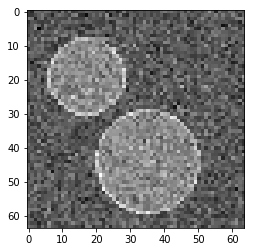

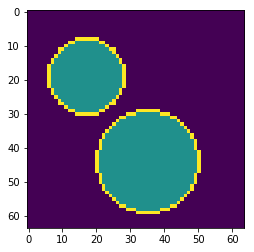

In [3]:
predata = Circles(radius=12, bg_color=0, perim_color=0.2, circle_color=0.1,
                  size=(64, 64), n_obj=5, var_n_obj=1, var_size=5, maxover=0)
x, y = predata.get_train_batch(1)
plt.imshow(x[0, 0],cmap='gray')
plt.figure()
plt.imshow(y[0])
plt.show()

## Training circles

In [4]:
def show_image_segm(gen_img, gen_segm, real_img, real_segm):
    for i, image in enumerate(gen_img):
        f, axarr = plt.subplots(2, 2, figsize=(10, 10))
        axarr[0, 0].imshow(image[0], cmap='gray')
        axarr[0, 0].set_title('Gen image')
        axarr[0, 1].imshow(real_img[i][0], cmap='gray')
        axarr[0, 1].set_title('Real image')
        axarr[1, 0].imshow(np.argmax(gen_segm[i], 0))
        axarr[1, 0].set_title('Gen segmentation')
        axarr[1, 1].imshow(real_segm[i])
        axarr[1, 1].set_title('Real segmentation')
    plt.show()

### Generate train batch

In [5]:
batch_size = 40

In [6]:
np.random.seed(42)
train_images, train_segmentation = predata.get_train_batch(batch_size)

In [7]:
train_images = Variable(torch.from_numpy(train_images).float(), requires_grad=False)
train_segmentation = Variable(torch.from_numpy(train_segmentation), requires_grad=False)

In [8]:
net = Network(num_z_channels=3, num_classes=3)
segm_loss = SegmentationLoss()
img_loss = ImageLoss()

### create latent variable

In [9]:
torch.manual_seed(42)
z_input = Variable(torch.randn(batch_size, 3, 64, 64), requires_grad=True)

### Training

In [10]:
def normalize_z(z):
    norm_z = z.data.norm(dim=1, p=2)
    norm_z = norm_z.unsqueeze(dim=1)
    norm_z = norm_z.repeat(1, 3, 1, 1)
    norm_z.clamp_(min=1.0)
    z.data = z.data / norm_z

In [11]:
without_segmentation = 10

In [12]:
def plot_segmentation(segm, gt_segm, num_epoch):
    segm_numpy = segm.data.numpy()
    gt_segm_numpy = gt_segm.data.numpy()
    for i, image in enumerate(segm_numpy):
        f, axarr = plt.subplots(1, 2, figsize=(10, 5))
        axarr[0].imshow(np.argmax(image, 0))
        axarr[0].set_title('Gen segmentation, epoch = {}'.format(num_epoch))
        axarr[1].imshow(gt_segm_numpy[i])
        axarr[1].set_title('Real segmentation')
    plt.show()

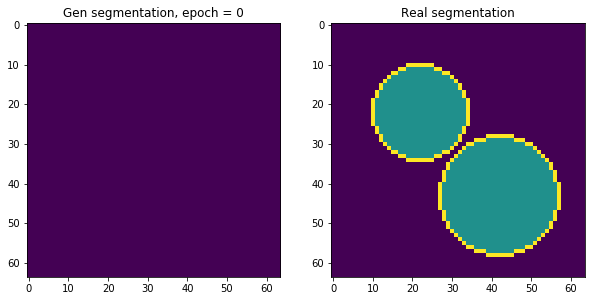

epoch - 0, loss - 6.647744655609131
epoch - 1, loss - 16.294208526611328
epoch - 2, loss - 6.372241973876953
epoch - 3, loss - 6.45414400100708
epoch - 4, loss - 6.6359171867370605
epoch - 5, loss - 6.602256774902344
epoch - 6, loss - 6.508498191833496
epoch - 7, loss - 6.398291110992432
epoch - 8, loss - 6.262998104095459
epoch - 9, loss - 6.162108421325684
epoch - 10, loss - 6.278675556182861
epoch - 11, loss - 6.242595195770264
epoch - 12, loss - 6.155336380004883
epoch - 13, loss - 6.1336283683776855
epoch - 14, loss - 6.139627456665039
epoch - 15, loss - 6.13721227645874
epoch - 16, loss - 6.120738983154297
epoch - 17, loss - 6.092131614685059
epoch - 18, loss - 6.053891658782959
epoch - 19, loss - 6.014960765838623


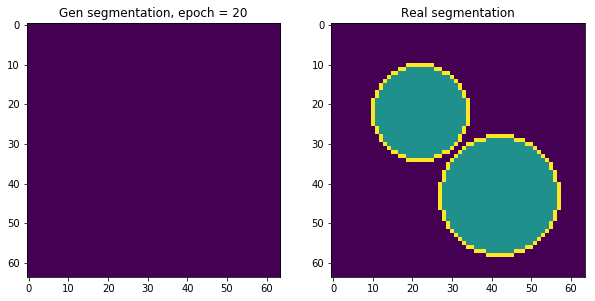

epoch - 20, loss - 5.9939866065979
epoch - 21, loss - 5.970800876617432
epoch - 22, loss - 5.920229911804199
epoch - 23, loss - 5.869675636291504
epoch - 24, loss - 5.844377517700195
epoch - 25, loss - 5.816625595092773
epoch - 26, loss - 5.796235084533691
epoch - 27, loss - 5.810303688049316
epoch - 28, loss - 5.805222511291504
epoch - 29, loss - 5.79863977432251
epoch - 30, loss - 5.78938102722168
epoch - 31, loss - 5.764917373657227
epoch - 32, loss - 5.7457427978515625
epoch - 33, loss - 5.733921527862549
epoch - 34, loss - 5.725454330444336
epoch - 35, loss - 5.7190632820129395
epoch - 36, loss - 5.713716983795166
epoch - 37, loss - 5.7058515548706055
epoch - 38, loss - 5.698019027709961
epoch - 39, loss - 5.6927266120910645


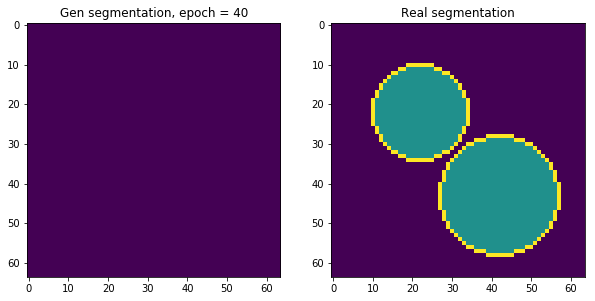

epoch - 40, loss - 5.684353351593018
epoch - 41, loss - 5.676668643951416
epoch - 42, loss - 5.6681976318359375
epoch - 43, loss - 5.659994125366211
epoch - 44, loss - 5.654268264770508
epoch - 45, loss - 5.649679660797119
epoch - 46, loss - 5.643757343292236
epoch - 47, loss - 5.637935161590576
epoch - 48, loss - 5.633334159851074
epoch - 49, loss - 5.629705429077148
epoch - 50, loss - 5.637143611907959
epoch - 51, loss - 5.631920337677002
epoch - 52, loss - 5.610965728759766
epoch - 53, loss - 5.612466812133789
epoch - 54, loss - 5.605308532714844
epoch - 55, loss - 5.603354454040527
epoch - 56, loss - 5.591184139251709
epoch - 57, loss - 5.580258846282959
epoch - 58, loss - 5.584165096282959
epoch - 59, loss - 5.63131046295166


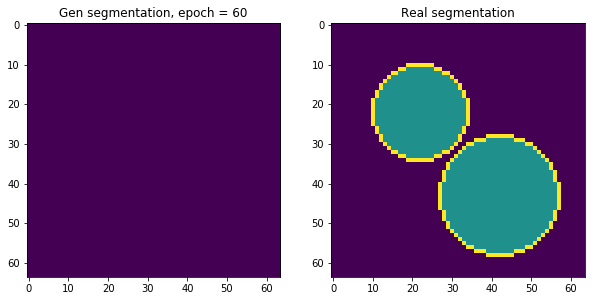

epoch - 60, loss - 5.57820463180542
epoch - 61, loss - 5.549860000610352
epoch - 62, loss - 5.557988166809082
epoch - 63, loss - 5.547946453094482
epoch - 64, loss - 5.542546272277832
epoch - 65, loss - 5.530514717102051
epoch - 66, loss - 5.517606735229492
epoch - 67, loss - 5.502605438232422
epoch - 68, loss - 5.494904041290283
epoch - 69, loss - 5.505588054656982
epoch - 70, loss - 5.620881080627441
epoch - 71, loss - 5.785999298095703
epoch - 72, loss - 5.474395751953125
epoch - 73, loss - 5.634962558746338
epoch - 74, loss - 5.482008934020996
epoch - 75, loss - 5.520473957061768
epoch - 76, loss - 5.546602249145508
epoch - 77, loss - 5.519756317138672
epoch - 78, loss - 5.516916275024414
epoch - 79, loss - 5.516327381134033


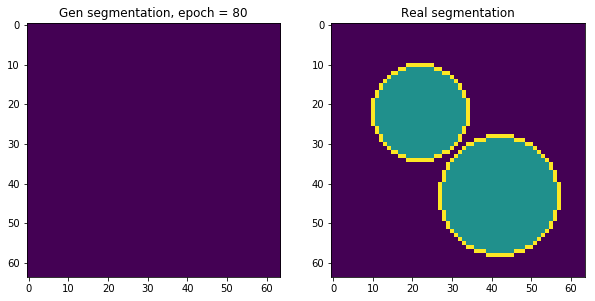

epoch - 80, loss - 5.478453636169434
epoch - 81, loss - 5.447185516357422
epoch - 82, loss - 5.42654275894165
epoch - 83, loss - 5.357556343078613
epoch - 84, loss - 5.371624946594238
epoch - 85, loss - 5.283192157745361
epoch - 86, loss - 5.183012962341309
epoch - 87, loss - 5.305724620819092
epoch - 88, loss - 5.667375564575195
epoch - 89, loss - 5.200647830963135
epoch - 90, loss - 5.266032695770264
epoch - 91, loss - 5.1002373695373535
epoch - 92, loss - 5.16476583480835
epoch - 93, loss - 4.95316743850708
epoch - 94, loss - 5.065836429595947
epoch - 95, loss - 4.8403191566467285
epoch - 96, loss - 4.885005950927734
epoch - 97, loss - 4.718597888946533
epoch - 98, loss - 4.715956687927246
epoch - 99, loss - 4.564676284790039


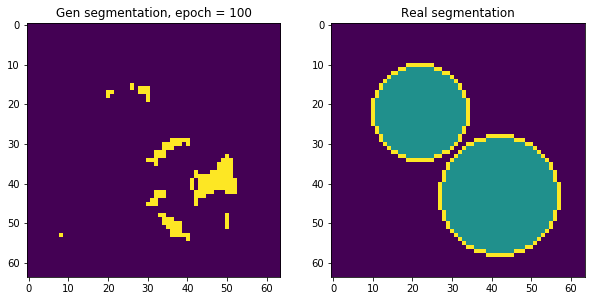

epoch - 100, loss - 4.6082940101623535
epoch - 101, loss - 4.397207736968994
epoch - 102, loss - 4.472743988037109
epoch - 103, loss - 4.3327412605285645
epoch - 104, loss - 4.263822555541992
epoch - 105, loss - 4.250909328460693
epoch - 106, loss - 4.136506080627441
epoch - 107, loss - 4.161013126373291
epoch - 108, loss - 4.055175304412842
epoch - 109, loss - 4.063683032989502
epoch - 110, loss - 3.970609188079834
epoch - 111, loss - 3.9793589115142822
epoch - 112, loss - 3.898958683013916
epoch - 113, loss - 3.9045379161834717
epoch - 114, loss - 3.837273359298706
epoch - 115, loss - 3.834399938583374
epoch - 116, loss - 3.7783985137939453
epoch - 117, loss - 3.772465944290161
epoch - 118, loss - 3.726386547088623
epoch - 119, loss - 3.720881700515747


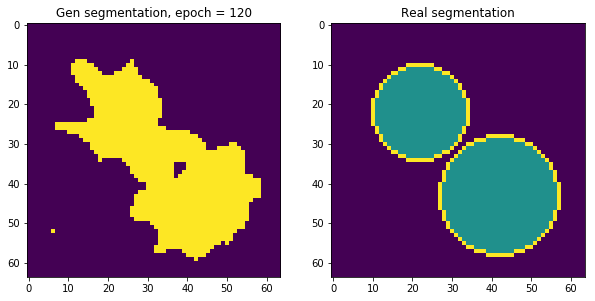

epoch - 120, loss - 3.6798298358917236
epoch - 121, loss - 3.6736152172088623
epoch - 122, loss - 3.637115001678467
epoch - 123, loss - 3.6288869380950928
epoch - 124, loss - 3.598344564437866
epoch - 125, loss - 3.5901427268981934
epoch - 126, loss - 3.562232494354248
epoch - 127, loss - 3.554208755493164
epoch - 128, loss - 3.53037691116333
epoch - 129, loss - 3.521721124649048
epoch - 130, loss - 3.498853921890259
epoch - 131, loss - 3.490192174911499
epoch - 132, loss - 3.4698808193206787
epoch - 133, loss - 3.4592387676239014
epoch - 134, loss - 3.4408624172210693
epoch - 135, loss - 3.4305098056793213
epoch - 136, loss - 3.412930965423584
epoch - 137, loss - 3.4020092487335205
epoch - 138, loss - 3.385951280593872
epoch - 139, loss - 3.3732059001922607


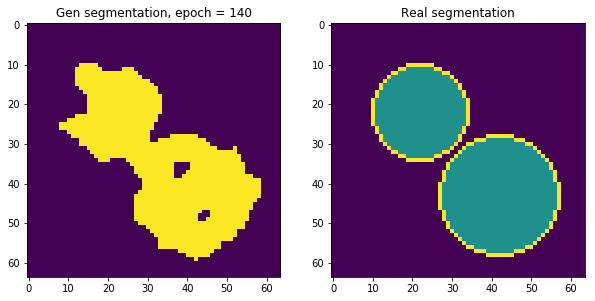

epoch - 140, loss - 3.3597095012664795
epoch - 141, loss - 3.3451664447784424
epoch - 142, loss - 3.3336181640625
epoch - 143, loss - 3.318397283554077
epoch - 144, loss - 3.307096004486084
epoch - 145, loss - 3.293919801712036
epoch - 146, loss - 3.280662775039673
epoch - 147, loss - 3.269991397857666
epoch - 148, loss - 3.256596565246582
epoch - 149, loss - 3.2441112995147705
epoch - 150, loss - 3.2331960201263428
epoch - 151, loss - 3.221198081970215
epoch - 152, loss - 3.2085983753204346
epoch - 153, loss - 3.1966280937194824
epoch - 154, loss - 3.185969352722168
epoch - 155, loss - 3.1761796474456787
epoch - 156, loss - 3.1660118103027344
epoch - 157, loss - 3.1565606594085693
epoch - 158, loss - 3.1470818519592285
epoch - 159, loss - 3.138221025466919


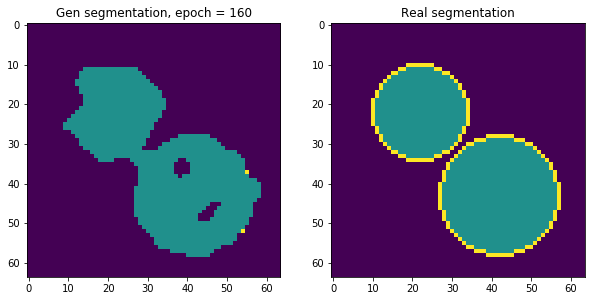

epoch - 160, loss - 3.130510091781616
epoch - 161, loss - 3.126394271850586
epoch - 162, loss - 3.1255457401275635
epoch - 163, loss - 3.1272199153900146
epoch - 164, loss - 3.133721113204956
epoch - 165, loss - 3.120748996734619
epoch - 166, loss - 3.098071336746216
epoch - 167, loss - 3.0613274574279785
epoch - 168, loss - 3.0426712036132812
epoch - 169, loss - 3.0440328121185303
epoch - 170, loss - 3.0523743629455566
epoch - 171, loss - 3.061610698699951
epoch - 172, loss - 3.0510032176971436
epoch - 173, loss - 3.033306837081909
epoch - 174, loss - 3.003319263458252
epoch - 175, loss - 2.983051061630249
epoch - 176, loss - 2.9780657291412354
epoch - 177, loss - 2.98325252532959
epoch - 178, loss - 2.9914674758911133
epoch - 179, loss - 2.9917380809783936


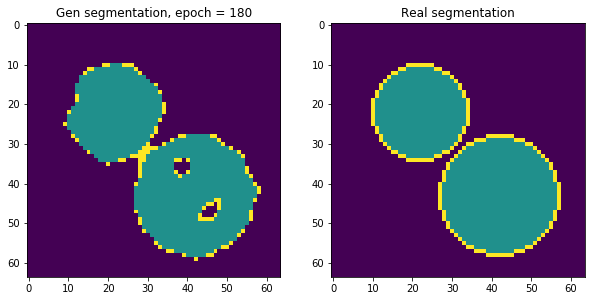

epoch - 180, loss - 2.9917678833007812
epoch - 181, loss - 2.9684977531433105
epoch - 182, loss - 2.946902275085449
epoch - 183, loss - 2.9352996349334717
epoch - 184, loss - 2.9255893230438232
epoch - 185, loss - 2.919481039047241
epoch - 186, loss - 2.920769453048706
epoch - 187, loss - 2.9300947189331055
epoch - 188, loss - 2.956853151321411
epoch - 189, loss - 2.9964332580566406
epoch - 190, loss - 2.986433982849121
epoch - 191, loss - 2.927495241165161
epoch - 192, loss - 2.8810017108917236
epoch - 193, loss - 2.8646044731140137
epoch - 194, loss - 2.8810982704162598
epoch - 195, loss - 2.899369239807129
epoch - 196, loss - 2.893348455429077
epoch - 197, loss - 2.866739511489868
epoch - 198, loss - 2.837531566619873
epoch - 199, loss - 2.8342466354370117


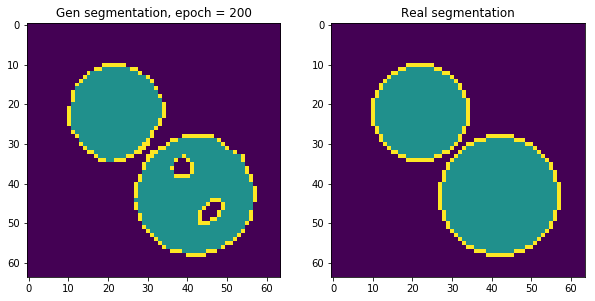

epoch - 200, loss - 2.8419551849365234
epoch - 201, loss - 2.848557710647583
epoch - 202, loss - 2.8418543338775635
epoch - 203, loss - 2.816556453704834
epoch - 204, loss - 2.7985386848449707
epoch - 205, loss - 2.7948122024536133
epoch - 206, loss - 2.793694257736206
epoch - 207, loss - 2.79179048538208
epoch - 208, loss - 2.7900161743164062
epoch - 209, loss - 2.7882344722747803
epoch - 210, loss - 2.7975752353668213
epoch - 211, loss - 2.8348875045776367
epoch - 212, loss - 2.9229843616485596
epoch - 213, loss - 3.0870206356048584
epoch - 214, loss - 2.9336068630218506
epoch - 215, loss - 2.7497920989990234
epoch - 216, loss - 2.8065414428710938
epoch - 217, loss - 2.870784282684326
epoch - 218, loss - 2.8013863563537598
epoch - 219, loss - 2.787630319595337


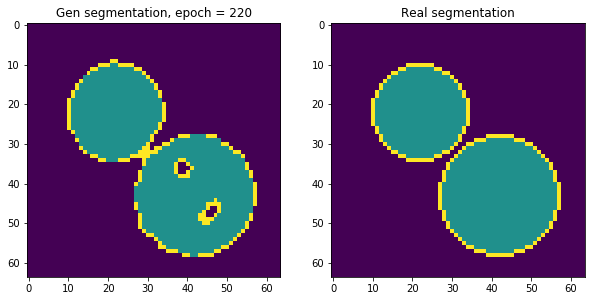

epoch - 220, loss - 2.7958691120147705
epoch - 221, loss - 2.822054862976074
epoch - 222, loss - 2.7982544898986816
epoch - 223, loss - 2.7490546703338623
epoch - 224, loss - 2.7740490436553955
epoch - 225, loss - 2.780379056930542
epoch - 226, loss - 2.7027406692504883
epoch - 227, loss - 2.7511093616485596
epoch - 228, loss - 2.724034309387207
epoch - 229, loss - 2.7186079025268555
epoch - 230, loss - 2.6904296875
epoch - 231, loss - 2.7268598079681396
epoch - 232, loss - 2.712819814682007
epoch - 233, loss - 2.68965744972229
epoch - 234, loss - 2.6728715896606445
epoch - 235, loss - 2.7072319984436035
epoch - 236, loss - 2.6951661109924316
epoch - 237, loss - 2.6869935989379883
epoch - 238, loss - 2.6436643600463867
epoch - 239, loss - 2.655439853668213


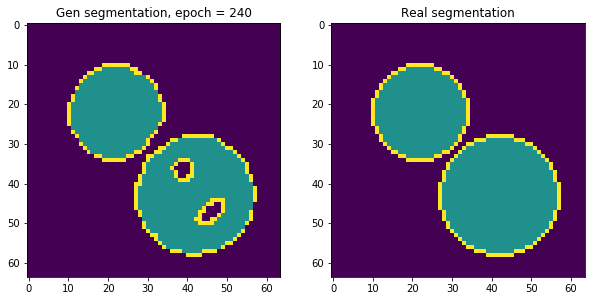

epoch - 240, loss - 2.6644794940948486
epoch - 241, loss - 2.65073299407959
epoch - 242, loss - 2.6359450817108154
epoch - 243, loss - 2.6153945922851562
epoch - 244, loss - 2.6209497451782227
epoch - 245, loss - 2.6168525218963623
epoch - 246, loss - 2.619438409805298
epoch - 247, loss - 2.6059963703155518
epoch - 248, loss - 2.602118968963623
epoch - 249, loss - 2.588338613510132
epoch - 250, loss - 2.580754518508911
epoch - 251, loss - 2.5779519081115723
epoch - 252, loss - 2.572127103805542
epoch - 253, loss - 2.575340509414673
epoch - 254, loss - 2.5799221992492676
epoch - 255, loss - 2.603764057159424
epoch - 256, loss - 2.6501729488372803
epoch - 257, loss - 2.7001588344573975
epoch - 258, loss - 2.7130866050720215
epoch - 259, loss - 2.602362871170044


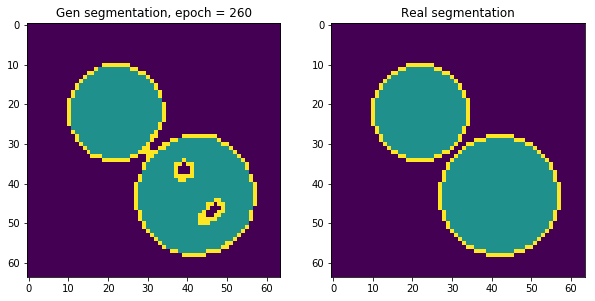

epoch - 260, loss - 2.5423738956451416
epoch - 261, loss - 2.572479486465454
epoch - 262, loss - 2.6122570037841797
epoch - 263, loss - 2.5868170261383057
epoch - 264, loss - 2.547999382019043
epoch - 265, loss - 2.53389048576355
epoch - 266, loss - 2.543902635574341
epoch - 267, loss - 2.548731565475464
epoch - 268, loss - 2.536515712738037
epoch - 269, loss - 2.52067494392395
epoch - 270, loss - 2.5065348148345947
epoch - 271, loss - 2.5154497623443604
epoch - 272, loss - 2.5212697982788086
epoch - 273, loss - 2.5055482387542725
epoch - 274, loss - 2.481950044631958
epoch - 275, loss - 2.473848342895508
epoch - 276, loss - 2.477281332015991
epoch - 277, loss - 2.479099988937378
epoch - 278, loss - 2.4714322090148926
epoch - 279, loss - 2.4734349250793457


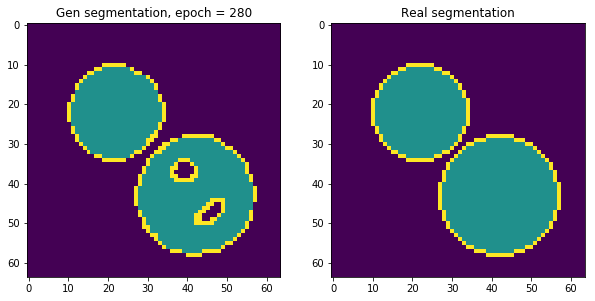

epoch - 280, loss - 2.5052330493927
epoch - 281, loss - 2.5428318977355957
epoch - 282, loss - 2.5530335903167725
epoch - 283, loss - 2.5300559997558594
epoch - 284, loss - 2.4983811378479004
epoch - 285, loss - 2.4811556339263916
epoch - 286, loss - 2.4548871517181396
epoch - 287, loss - 2.435877561569214
epoch - 288, loss - 2.453284740447998
epoch - 289, loss - 2.488287925720215
epoch - 290, loss - 2.4675238132476807
epoch - 291, loss - 2.4299657344818115
epoch - 292, loss - 2.413975715637207
epoch - 293, loss - 2.415003538131714
epoch - 294, loss - 2.4123401641845703
epoch - 295, loss - 2.4133918285369873
epoch - 296, loss - 2.4290404319763184
epoch - 297, loss - 2.4548308849334717
epoch - 298, loss - 2.4482715129852295
epoch - 299, loss - 2.412452459335327


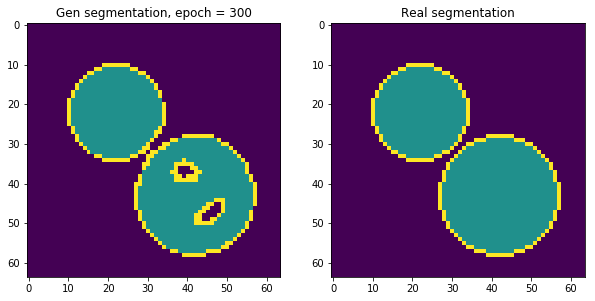

epoch - 300, loss - 2.3920862674713135
epoch - 301, loss - 2.385357618331909
epoch - 302, loss - 2.3725743293762207
epoch - 303, loss - 2.3649260997772217
epoch - 304, loss - 2.374452829360962
epoch - 305, loss - 2.394435405731201
epoch - 306, loss - 2.416447639465332
epoch - 307, loss - 2.43131685256958
epoch - 308, loss - 2.4076244831085205
epoch - 309, loss - 2.372499704360962
epoch - 310, loss - 2.34161639213562
epoch - 311, loss - 2.32427978515625
epoch - 312, loss - 2.325340747833252
epoch - 313, loss - 2.341686487197876
epoch - 314, loss - 2.3579981327056885
epoch - 315, loss - 2.3623647689819336
epoch - 316, loss - 2.3474860191345215
epoch - 317, loss - 2.321866273880005
epoch - 318, loss - 2.306544303894043
epoch - 319, loss - 2.303279399871826


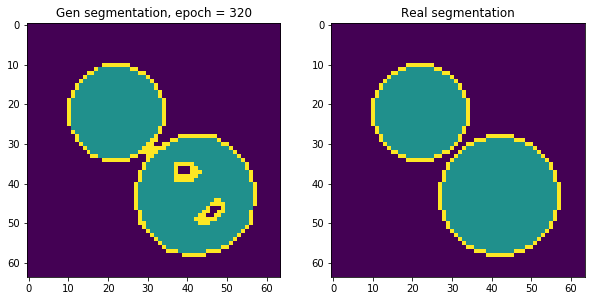

epoch - 320, loss - 2.3012726306915283
epoch - 321, loss - 2.2984302043914795
epoch - 322, loss - 2.3059701919555664
epoch - 323, loss - 2.3229446411132812
epoch - 324, loss - 2.3504490852355957
epoch - 325, loss - 2.373255729675293
epoch - 326, loss - 2.3761889934539795
epoch - 327, loss - 2.3725340366363525
epoch - 328, loss - 2.3541641235351562
epoch - 329, loss - 2.3273866176605225
epoch - 330, loss - 2.279207944869995
epoch - 331, loss - 2.248985528945923
epoch - 332, loss - 2.2726387977600098
epoch - 333, loss - 2.3059661388397217
epoch - 334, loss - 2.2840445041656494
epoch - 335, loss - 2.2382078170776367
epoch - 336, loss - 2.2273645401000977
epoch - 337, loss - 2.2485527992248535
epoch - 338, loss - 2.2500171661376953
epoch - 339, loss - 2.226501703262329


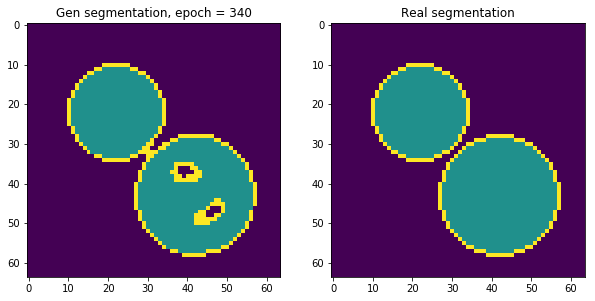

epoch - 340, loss - 2.217130422592163
epoch - 341, loss - 2.2282485961914062
epoch - 342, loss - 2.2258434295654297
epoch - 343, loss - 2.203808546066284
epoch - 344, loss - 2.187420606613159
epoch - 345, loss - 2.1901354789733887
epoch - 346, loss - 2.2020785808563232
epoch - 347, loss - 2.207024097442627
epoch - 348, loss - 2.1985440254211426
epoch - 349, loss - 2.1818599700927734
epoch - 350, loss - 2.167750120162964
epoch - 351, loss - 2.1660587787628174
epoch - 352, loss - 2.1840660572052
epoch - 353, loss - 2.2312254905700684
epoch - 354, loss - 2.298196315765381
epoch - 355, loss - 2.318998098373413
epoch - 356, loss - 2.3012406826019287
epoch - 357, loss - 2.3216817378997803
epoch - 358, loss - 2.294867992401123
epoch - 359, loss - 2.2158403396606445


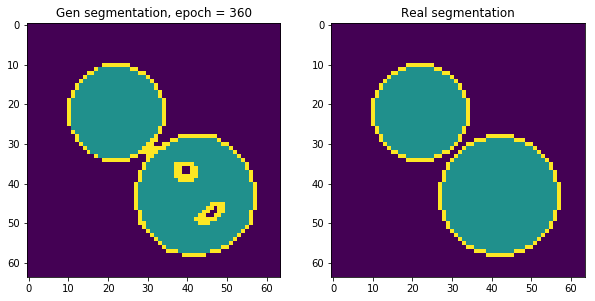

epoch - 360, loss - 2.166172981262207
epoch - 361, loss - 2.2153408527374268
epoch - 362, loss - 2.203824520111084
epoch - 363, loss - 2.1269335746765137
epoch - 364, loss - 2.1552374362945557
epoch - 365, loss - 2.171957015991211
epoch - 366, loss - 2.1136116981506348
epoch - 367, loss - 2.123561382293701
epoch - 368, loss - 2.137915849685669
epoch - 369, loss - 2.0954222679138184
epoch - 370, loss - 2.104945182800293
epoch - 371, loss - 2.114194393157959
epoch - 372, loss - 2.0868875980377197
epoch - 373, loss - 2.102158546447754
epoch - 374, loss - 2.121533155441284
epoch - 375, loss - 2.134925365447998
epoch - 376, loss - 2.17865252494812
epoch - 377, loss - 2.175825357437134
epoch - 378, loss - 2.104686975479126
epoch - 379, loss - 2.068934917449951


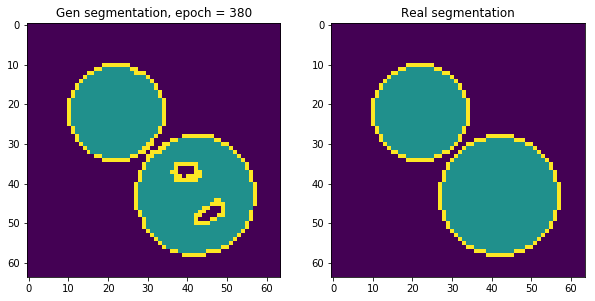

epoch - 380, loss - 2.067237377166748
epoch - 381, loss - 2.0886240005493164
epoch - 382, loss - 2.1247987747192383
epoch - 383, loss - 2.108889102935791
epoch - 384, loss - 2.048617362976074
epoch - 385, loss - 2.0296080112457275
epoch - 386, loss - 2.0564045906066895
epoch - 387, loss - 2.061068296432495
epoch - 388, loss - 2.0400452613830566
epoch - 389, loss - 2.0164573192596436
epoch - 390, loss - 2.0094549655914307
epoch - 391, loss - 2.018742084503174
epoch - 392, loss - 2.0233712196350098
epoch - 393, loss - 2.0151257514953613
epoch - 394, loss - 1.9959197044372559
epoch - 395, loss - 1.9803050756454468
epoch - 396, loss - 1.97832190990448
epoch - 397, loss - 1.9811925888061523
epoch - 398, loss - 1.9847495555877686
epoch - 399, loss - 1.9881787300109863


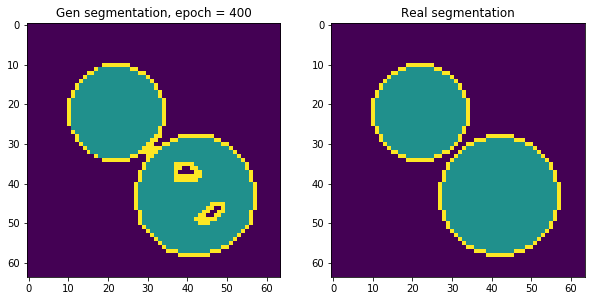

epoch - 400, loss - 1.994325041770935
epoch - 401, loss - 2.005096673965454
epoch - 402, loss - 2.016437530517578
epoch - 403, loss - 2.025594472885132
epoch - 404, loss - 2.0142407417297363
epoch - 405, loss - 1.9810794591903687
epoch - 406, loss - 1.9462724924087524
epoch - 407, loss - 1.9299938678741455
epoch - 408, loss - 1.937578558921814
epoch - 409, loss - 1.9487074613571167
epoch - 410, loss - 1.9474067687988281
epoch - 411, loss - 1.9374103546142578
epoch - 412, loss - 1.9248533248901367
epoch - 413, loss - 1.9162038564682007
epoch - 414, loss - 1.9104385375976562
epoch - 415, loss - 1.903185486793518
epoch - 416, loss - 1.898898720741272
epoch - 417, loss - 1.903125524520874
epoch - 418, loss - 1.916725516319275
epoch - 419, loss - 1.9408854246139526


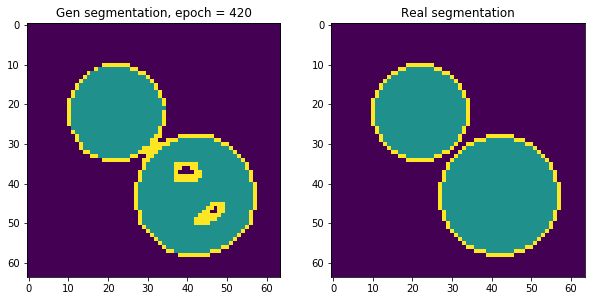

epoch - 420, loss - 1.9845304489135742
epoch - 421, loss - 2.0356667041778564
epoch - 422, loss - 2.0583629608154297
epoch - 423, loss - 2.004326581954956
epoch - 424, loss - 1.9007518291473389
epoch - 425, loss - 1.8581041097640991
epoch - 426, loss - 1.9100335836410522
epoch - 427, loss - 1.9571762084960938
epoch - 428, loss - 1.9205691814422607
epoch - 429, loss - 1.8533631563186646
epoch - 430, loss - 1.8496625423431396
epoch - 431, loss - 1.8851544857025146
epoch - 432, loss - 1.8766661882400513
epoch - 433, loss - 1.8375959396362305
epoch - 434, loss - 1.826326608657837
epoch - 435, loss - 1.8405781984329224
epoch - 436, loss - 1.8425792455673218
epoch - 437, loss - 1.8235867023468018
epoch - 438, loss - 1.8124221563339233
epoch - 439, loss - 1.815590500831604


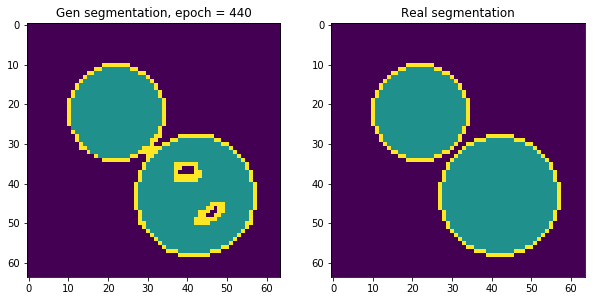

epoch - 440, loss - 1.8133739233016968
epoch - 441, loss - 1.806510329246521
epoch - 442, loss - 1.7996183633804321
epoch - 443, loss - 1.7963988780975342
epoch - 444, loss - 1.7888615131378174
epoch - 445, loss - 1.7786192893981934
epoch - 446, loss - 1.769289255142212
epoch - 447, loss - 1.7643725872039795
epoch - 448, loss - 1.7691961526870728
epoch - 449, loss - 1.7794609069824219
epoch - 450, loss - 1.7972205877304077
epoch - 451, loss - 1.8206350803375244
epoch - 452, loss - 1.8386086225509644
epoch - 453, loss - 1.8297972679138184
epoch - 454, loss - 1.7895561456680298
epoch - 455, loss - 1.7424176931381226
epoch - 456, loss - 1.7199808359146118
epoch - 457, loss - 1.7319049835205078
epoch - 458, loss - 1.7545346021652222
epoch - 459, loss - 1.7595107555389404


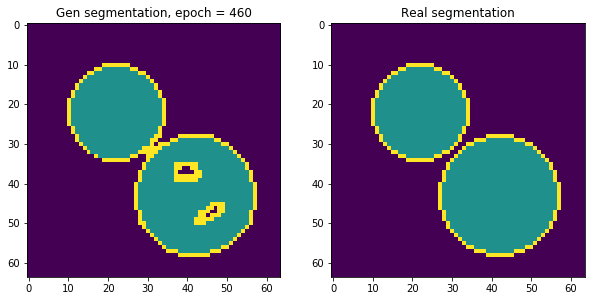

epoch - 460, loss - 1.7429563999176025
epoch - 461, loss - 1.7158000469207764
epoch - 462, loss - 1.7052717208862305
epoch - 463, loss - 1.7137483358383179
epoch - 464, loss - 1.7178343534469604
epoch - 465, loss - 1.712066411972046
epoch - 466, loss - 1.6984291076660156
epoch - 467, loss - 1.680743932723999
epoch - 468, loss - 1.6700645685195923
epoch - 469, loss - 1.673666000366211
epoch - 470, loss - 1.6841709613800049
epoch - 471, loss - 1.6965278387069702
epoch - 472, loss - 1.7113120555877686
epoch - 473, loss - 1.717652678489685
epoch - 474, loss - 1.7169691324234009
epoch - 475, loss - 1.700293779373169
epoch - 476, loss - 1.6764590740203857
epoch - 477, loss - 1.6540395021438599
epoch - 478, loss - 1.6398104429244995
epoch - 479, loss - 1.6427451372146606


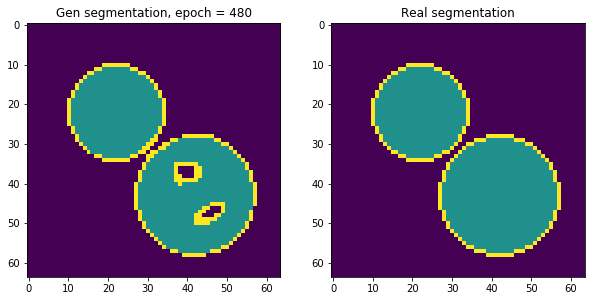

epoch - 480, loss - 1.6551228761672974
epoch - 481, loss - 1.6684861183166504
epoch - 482, loss - 1.6669987440109253
epoch - 483, loss - 1.6445627212524414
epoch - 484, loss - 1.6126840114593506
epoch - 485, loss - 1.5937327146530151
epoch - 486, loss - 1.600854754447937
epoch - 487, loss - 1.6200494766235352
epoch - 488, loss - 1.6392302513122559
epoch - 489, loss - 1.6625124216079712
epoch - 490, loss - 1.698033332824707
epoch - 491, loss - 1.725719928741455
epoch - 492, loss - 1.7173175811767578
epoch - 493, loss - 1.656481146812439
epoch - 494, loss - 1.5876737833023071
epoch - 495, loss - 1.5667552947998047
epoch - 496, loss - 1.6010359525680542
epoch - 497, loss - 1.6482630968093872
epoch - 498, loss - 1.6217515468597412
epoch - 499, loss - 1.5566554069519043


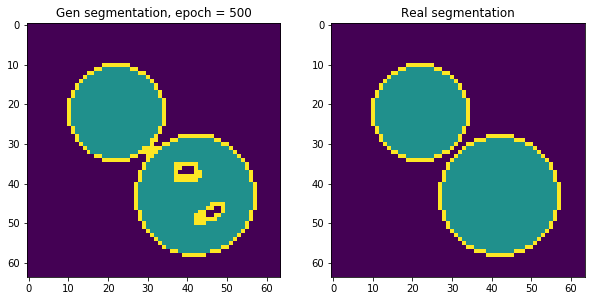

epoch - 500, loss - 1.5354429483413696
epoch - 501, loss - 1.5682084560394287
epoch - 502, loss - 1.5872095823287964
epoch - 503, loss - 1.5657087564468384
epoch - 504, loss - 1.5306849479675293
epoch - 505, loss - 1.5191093683242798
epoch - 506, loss - 1.5191655158996582
epoch - 507, loss - 1.5251814126968384
epoch - 508, loss - 1.5314241647720337
epoch - 509, loss - 1.5411056280136108
epoch - 510, loss - 1.5410043001174927
epoch - 511, loss - 1.5240610837936401
epoch - 512, loss - 1.4994648694992065
epoch - 513, loss - 1.481613278388977
epoch - 514, loss - 1.4734028577804565
epoch - 515, loss - 1.4724528789520264
epoch - 516, loss - 1.479719877243042
epoch - 517, loss - 1.4815537929534912
epoch - 518, loss - 1.4855084419250488
epoch - 519, loss - 1.4798258543014526


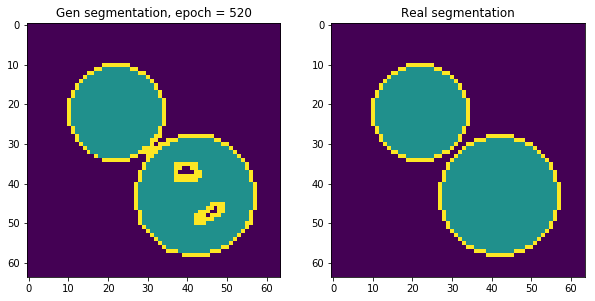

epoch - 520, loss - 1.4851962327957153
epoch - 521, loss - 1.4832662343978882
epoch - 522, loss - 1.4781925678253174
epoch - 523, loss - 1.4728671312332153
epoch - 524, loss - 1.4623067378997803
epoch - 525, loss - 1.4466124773025513
epoch - 526, loss - 1.4295562505722046
epoch - 527, loss - 1.4163436889648438
epoch - 528, loss - 1.4118577241897583
epoch - 529, loss - 1.4146124124526978
epoch - 530, loss - 1.4171301126480103
epoch - 531, loss - 1.426495909690857
epoch - 532, loss - 1.428709864616394
epoch - 533, loss - 1.4454126358032227
epoch - 534, loss - 1.4624539613723755
epoch - 535, loss - 1.4848337173461914
epoch - 536, loss - 1.483768105506897
epoch - 537, loss - 1.4668031930923462
epoch - 538, loss - 1.4230225086212158
epoch - 539, loss - 1.3934696912765503


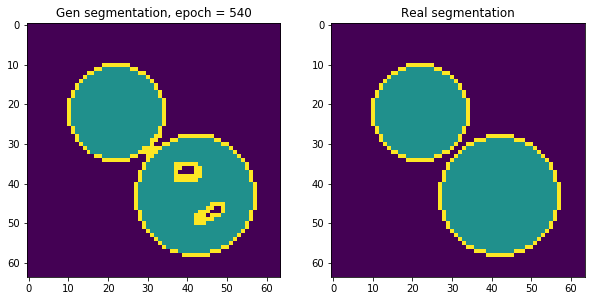

epoch - 540, loss - 1.3875329494476318
epoch - 541, loss - 1.3991727828979492
epoch - 542, loss - 1.4019050598144531
epoch - 543, loss - 1.3807356357574463
epoch - 544, loss - 1.3531653881072998
epoch - 545, loss - 1.3444222211837769
epoch - 546, loss - 1.3528403043746948
epoch - 547, loss - 1.3646466732025146
epoch - 548, loss - 1.3613319396972656
epoch - 549, loss - 1.3526310920715332
epoch - 550, loss - 1.3302803039550781
epoch - 551, loss - 1.3164268732070923
epoch - 552, loss - 1.3094185590744019
epoch - 553, loss - 1.31109619140625
epoch - 554, loss - 1.3171957731246948
epoch - 555, loss - 1.3219068050384521
epoch - 556, loss - 1.3305472135543823
epoch - 557, loss - 1.3400300741195679
epoch - 558, loss - 1.3607592582702637
epoch - 559, loss - 1.3752779960632324


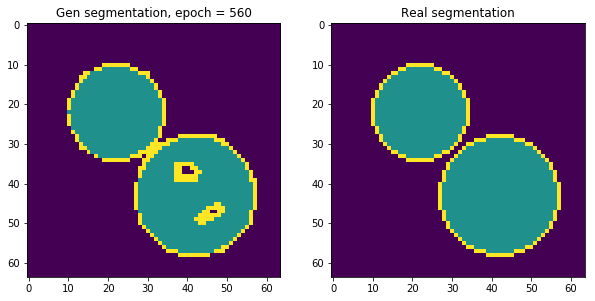

epoch - 560, loss - 1.3803999423980713
epoch - 561, loss - 1.3598867654800415
epoch - 562, loss - 1.3424938917160034
epoch - 563, loss - 1.338980793952942
epoch - 564, loss - 1.3424776792526245
epoch - 565, loss - 1.3439085483551025
epoch - 566, loss - 1.3086998462677002
epoch - 567, loss - 1.2748901844024658
epoch - 568, loss - 1.255469799041748
epoch - 569, loss - 1.2673615217208862
epoch - 570, loss - 1.2806235551834106
epoch - 571, loss - 1.2576245069503784
epoch - 572, loss - 1.2351477146148682
epoch - 573, loss - 1.2301554679870605
epoch - 574, loss - 1.2423173189163208
epoch - 575, loss - 1.2492170333862305
epoch - 576, loss - 1.2484608888626099
epoch - 577, loss - 1.276041030883789
epoch - 578, loss - 1.3352222442626953
epoch - 579, loss - 1.3468509912490845


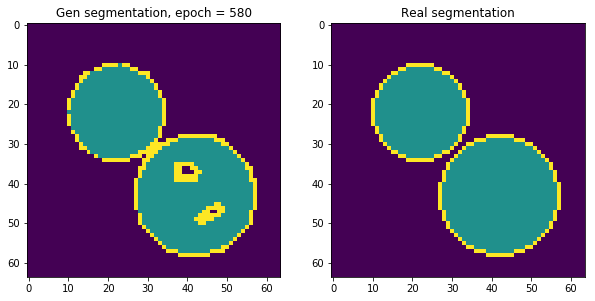

epoch - 580, loss - 1.303362488746643
epoch - 581, loss - 1.2274281978607178
epoch - 582, loss - 1.197983741760254
epoch - 583, loss - 1.2147555351257324
epoch - 584, loss - 1.240322470664978
epoch - 585, loss - 1.2627202272415161
epoch - 586, loss - 1.2367786169052124
epoch - 587, loss - 1.2078081369400024
epoch - 588, loss - 1.1881991624832153
epoch - 589, loss - 1.1916732788085938
epoch - 590, loss - 1.2078077793121338
epoch - 591, loss - 1.2065987586975098
epoch - 592, loss - 1.1965433359146118
epoch - 593, loss - 1.1753880977630615
epoch - 594, loss - 1.1566359996795654
epoch - 595, loss - 1.1530635356903076
epoch - 596, loss - 1.1614549160003662
epoch - 597, loss - 1.1773009300231934
epoch - 598, loss - 1.1753294467926025
epoch - 599, loss - 1.156830906867981


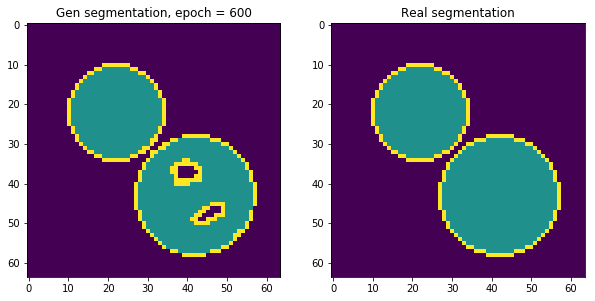

epoch - 600, loss - 1.1394343376159668
epoch - 601, loss - 1.1230846643447876
epoch - 602, loss - 1.1203433275222778
epoch - 603, loss - 1.118499755859375
epoch - 604, loss - 1.110866665840149
epoch - 605, loss - 1.1077790260314941
epoch - 606, loss - 1.111559271812439
epoch - 607, loss - 1.1261577606201172
epoch - 608, loss - 1.15009343624115
epoch - 609, loss - 1.1670342683792114
epoch - 610, loss - 1.1785199642181396
epoch - 611, loss - 1.1604853868484497
epoch - 612, loss - 1.1311345100402832
epoch - 613, loss - 1.0975736379623413
epoch - 614, loss - 1.0778040885925293
epoch - 615, loss - 1.0780856609344482
epoch - 616, loss - 1.086643934249878
epoch - 617, loss - 1.0989501476287842
epoch - 618, loss - 1.0947096347808838
epoch - 619, loss - 1.0784964561462402


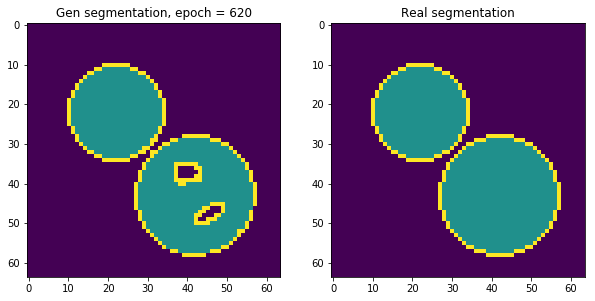

epoch - 620, loss - 1.062717318534851
epoch - 621, loss - 1.05046546459198
epoch - 622, loss - 1.0551780462265015
epoch - 623, loss - 1.058523416519165
epoch - 624, loss - 1.0662121772766113
epoch - 625, loss - 1.0701180696487427
epoch - 626, loss - 1.0752973556518555
epoch - 627, loss - 1.0760281085968018
epoch - 628, loss - 1.0721465349197388
epoch - 629, loss - 1.0584157705307007
epoch - 630, loss - 1.03575599193573
epoch - 631, loss - 1.021750569343567
epoch - 632, loss - 1.0063459873199463
epoch - 633, loss - 1.0043411254882812
epoch - 634, loss - 1.000557541847229
epoch - 635, loss - 1.0094910860061646
epoch - 636, loss - 1.0143249034881592
epoch - 637, loss - 1.0265635251998901
epoch - 638, loss - 1.0247399806976318
epoch - 639, loss - 1.0355039834976196


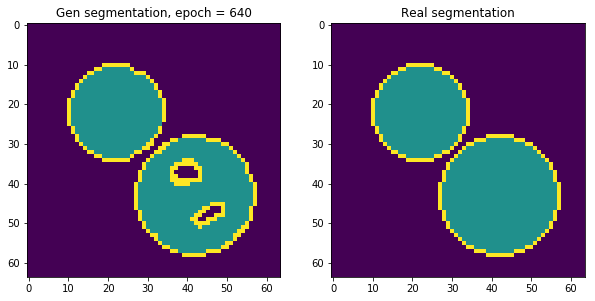

epoch - 640, loss - 1.0417160987854004
epoch - 641, loss - 1.0539932250976562
epoch - 642, loss - 1.0326831340789795
epoch - 643, loss - 1.016113042831421
epoch - 644, loss - 0.9808570742607117
epoch - 645, loss - 0.9704096913337708
epoch - 646, loss - 0.9601319432258606
epoch - 647, loss - 0.973664402961731
epoch - 648, loss - 0.9728915095329285
epoch - 649, loss - 0.9702394008636475
epoch - 650, loss - 0.9534172415733337
epoch - 651, loss - 0.9471248984336853
epoch - 652, loss - 0.9390910863876343
epoch - 653, loss - 0.9385672807693481
epoch - 654, loss - 0.9444336891174316
epoch - 655, loss - 0.9452505707740784
epoch - 656, loss - 0.9507274627685547
epoch - 657, loss - 0.9659041166305542
epoch - 658, loss - 0.9673963785171509
epoch - 659, loss - 0.9757289290428162


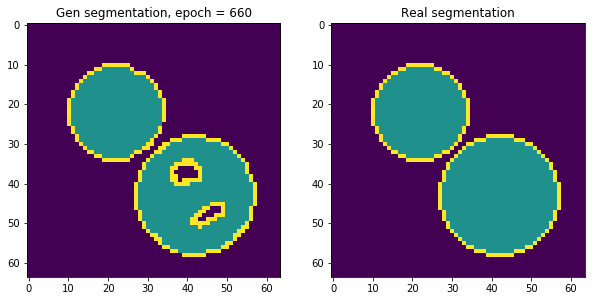

epoch - 660, loss - 0.9796180129051208
epoch - 661, loss - 0.977971613407135
epoch - 662, loss - 0.961295485496521
epoch - 663, loss - 0.9424812197685242
epoch - 664, loss - 0.9226480722427368
epoch - 665, loss - 0.9272525906562805
epoch - 666, loss - 0.9451931118965149
epoch - 667, loss - 0.9724717140197754
epoch - 668, loss - 0.9882921576499939
epoch - 669, loss - 0.963255763053894
epoch - 670, loss - 0.9146207571029663
epoch - 671, loss - 0.8771888613700867
epoch - 672, loss - 0.8848682641983032
epoch - 673, loss - 0.9136971235275269
epoch - 674, loss - 0.9169639945030212
epoch - 675, loss - 0.900931715965271
epoch - 676, loss - 0.8921694755554199
epoch - 677, loss - 0.915340781211853
epoch - 678, loss - 0.9338305592536926
epoch - 679, loss - 0.9338546395301819


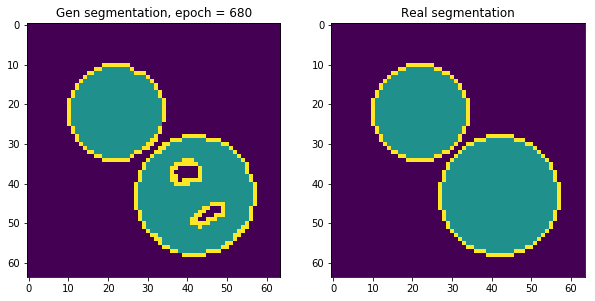

epoch - 680, loss - 0.9178112745285034
epoch - 681, loss - 0.9115042686462402
epoch - 682, loss - 0.8909627795219421
epoch - 683, loss - 0.8631532788276672
epoch - 684, loss - 0.8377604484558105
epoch - 685, loss - 0.8438687324523926
epoch - 686, loss - 0.8633949160575867
epoch - 687, loss - 0.8670820593833923
epoch - 688, loss - 0.8494447469711304
epoch - 689, loss - 0.8330768346786499
epoch - 690, loss - 0.8237425088882446
epoch - 691, loss - 0.8233326077461243
epoch - 692, loss - 0.8168079853057861
epoch - 693, loss - 0.8153607249259949
epoch - 694, loss - 0.8193893432617188
epoch - 695, loss - 0.8212710022926331
epoch - 696, loss - 0.8236772418022156
epoch - 697, loss - 0.8163140416145325
epoch - 698, loss - 0.8172241449356079
epoch - 699, loss - 0.8267168402671814


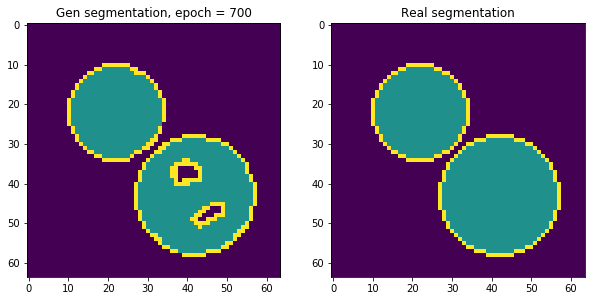

epoch - 700, loss - 0.8432817459106445
epoch - 701, loss - 0.8662410974502563
epoch - 702, loss - 0.8612837791442871
epoch - 703, loss - 0.8459576368331909
epoch - 704, loss - 0.8166707158088684
epoch - 705, loss - 0.7940880060195923
epoch - 706, loss - 0.7774866819381714
epoch - 707, loss - 0.7735368609428406
epoch - 708, loss - 0.7786357998847961
epoch - 709, loss - 0.7818717360496521
epoch - 710, loss - 0.7819321751594543
epoch - 711, loss - 0.774682879447937
epoch - 712, loss - 0.7626976370811462
epoch - 713, loss - 0.7524958848953247
epoch - 714, loss - 0.7464297413825989
epoch - 715, loss - 0.7465226650238037
epoch - 716, loss - 0.752018392086029
epoch - 717, loss - 0.7609564661979675
epoch - 718, loss - 0.7749985456466675
epoch - 719, loss - 0.7982746958732605


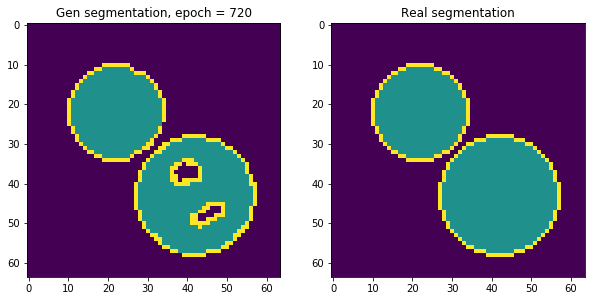

epoch - 720, loss - 0.8210537433624268
epoch - 721, loss - 0.8414456248283386
epoch - 722, loss - 0.8243004679679871
epoch - 723, loss - 0.7880915999412537
epoch - 724, loss - 0.7483319640159607
epoch - 725, loss - 0.7309014201164246
epoch - 726, loss - 0.7493003606796265
epoch - 727, loss - 0.7701230645179749
epoch - 728, loss - 0.7735053300857544
epoch - 729, loss - 0.7361879944801331
epoch - 730, loss - 0.718390166759491
epoch - 731, loss - 0.7244443297386169
epoch - 732, loss - 0.7215645909309387
epoch - 733, loss - 0.7332636713981628
epoch - 734, loss - 0.7242779731750488
epoch - 735, loss - 0.7123708724975586
epoch - 736, loss - 0.7019658088684082
epoch - 737, loss - 0.6907627582550049
epoch - 738, loss - 0.6960265636444092
epoch - 739, loss - 0.6986000537872314


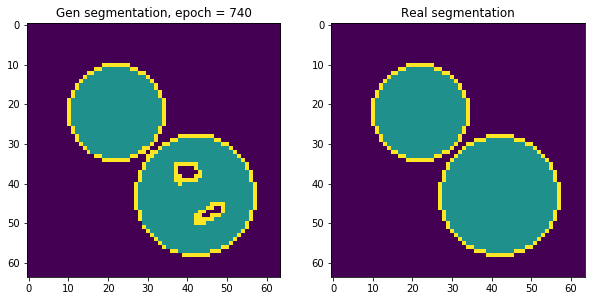

epoch - 740, loss - 0.7030900716781616
epoch - 741, loss - 0.7031885385513306
epoch - 742, loss - 0.708124041557312
epoch - 743, loss - 0.7046058177947998
epoch - 744, loss - 0.7025853395462036
epoch - 745, loss - 0.7117059826850891
epoch - 746, loss - 0.7101784944534302
epoch - 747, loss - 0.7088819146156311
epoch - 748, loss - 0.6953185796737671
epoch - 749, loss - 0.6863881349563599
epoch - 750, loss - 0.6665574312210083
epoch - 751, loss - 0.6608647704124451
epoch - 752, loss - 0.6560664176940918
epoch - 753, loss - 0.661427915096283
epoch - 754, loss - 0.6641885638237
epoch - 755, loss - 0.670586347579956
epoch - 756, loss - 0.6695919036865234
epoch - 757, loss - 0.675748348236084
epoch - 758, loss - 0.6774499416351318
epoch - 759, loss - 0.6830427050590515


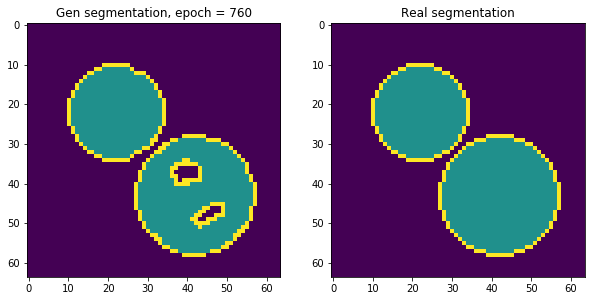

epoch - 760, loss - 0.6900736093521118
epoch - 761, loss - 0.691199779510498
epoch - 762, loss - 0.6743412017822266
epoch - 763, loss - 0.6662651300430298
epoch - 764, loss - 0.651797354221344
epoch - 765, loss - 0.6358954310417175
epoch - 766, loss - 0.6205565929412842
epoch - 767, loss - 0.6295979619026184
epoch - 768, loss - 0.6276364922523499
epoch - 769, loss - 0.6314883828163147
epoch - 770, loss - 0.6221283078193665
epoch - 771, loss - 0.6152704358100891
epoch - 772, loss - 0.6040809154510498
epoch - 773, loss - 0.6070384383201599
epoch - 774, loss - 0.6028996706008911
epoch - 775, loss - 0.6096038222312927
epoch - 776, loss - 0.6142223477363586
epoch - 777, loss - 0.6285662055015564
epoch - 778, loss - 0.6458573341369629
epoch - 779, loss - 0.677139163017273


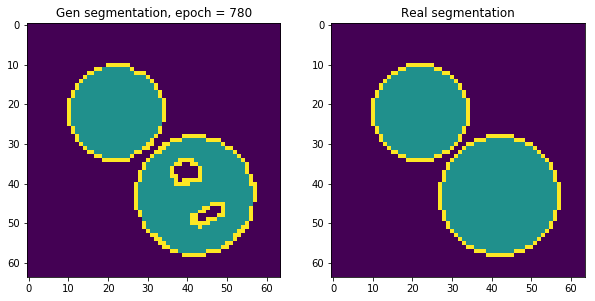

epoch - 780, loss - 0.6850274205207825
epoch - 781, loss - 0.6849929690361023
epoch - 782, loss - 0.6416914463043213
epoch - 783, loss - 0.6068050861358643
epoch - 784, loss - 0.5925365686416626
epoch - 785, loss - 0.6057052612304688
epoch - 786, loss - 0.6200825572013855
epoch - 787, loss - 0.6361082792282104
epoch - 788, loss - 0.6253889203071594
epoch - 789, loss - 0.6057455539703369
epoch - 790, loss - 0.5955378413200378
epoch - 791, loss - 0.603863537311554
epoch - 792, loss - 0.5976263880729675
epoch - 793, loss - 0.6036597490310669
epoch - 794, loss - 0.5907183885574341
epoch - 795, loss - 0.573215901851654
epoch - 796, loss - 0.566202700138092
epoch - 797, loss - 0.5628315210342407
epoch - 798, loss - 0.5564784407615662
epoch - 799, loss - 0.5610896348953247


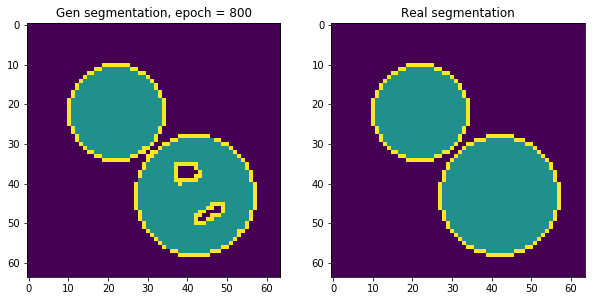

epoch - 800, loss - 0.5624787211418152
epoch - 801, loss - 0.5613406300544739
epoch - 802, loss - 0.5723618865013123
epoch - 803, loss - 0.5750219225883484
epoch - 804, loss - 0.580638587474823
epoch - 805, loss - 0.589714765548706
epoch - 806, loss - 0.5842974185943604
epoch - 807, loss - 0.572456955909729
epoch - 808, loss - 0.5698288083076477
epoch - 809, loss - 0.5474143028259277
epoch - 810, loss - 0.5342302918434143
epoch - 811, loss - 0.5322981476783752
epoch - 812, loss - 0.5302055478096008
epoch - 813, loss - 0.5355595350265503
epoch - 814, loss - 0.5395731925964355
epoch - 815, loss - 0.5298862457275391
epoch - 816, loss - 0.5258898138999939
epoch - 817, loss - 0.5195252895355225
epoch - 818, loss - 0.5108823180198669
epoch - 819, loss - 0.5085917115211487


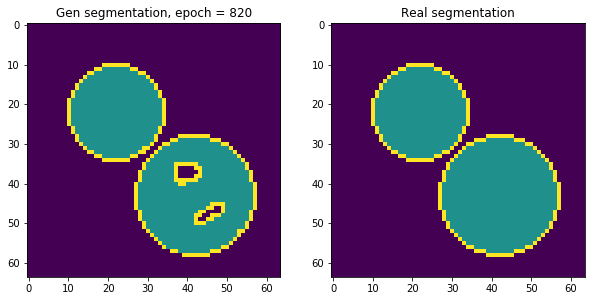

epoch - 820, loss - 0.5083259344100952
epoch - 821, loss - 0.5095619559288025
epoch - 822, loss - 0.5161634683609009
epoch - 823, loss - 0.5219460129737854
epoch - 824, loss - 0.535447359085083
epoch - 825, loss - 0.5584756135940552
epoch - 826, loss - 0.593732476234436
epoch - 827, loss - 0.6121501922607422
epoch - 828, loss - 0.6016439199447632
epoch - 829, loss - 0.5545930862426758
epoch - 830, loss - 0.5119224190711975
epoch - 831, loss - 0.49476704001426697
epoch - 832, loss - 0.5006177425384521
epoch - 833, loss - 0.5278571248054504
epoch - 834, loss - 0.5500283241271973
epoch - 835, loss - 0.55035400390625
epoch - 836, loss - 0.5175148844718933
epoch - 837, loss - 0.4998607039451599
epoch - 838, loss - 0.49496012926101685
epoch - 839, loss - 0.5035639405250549


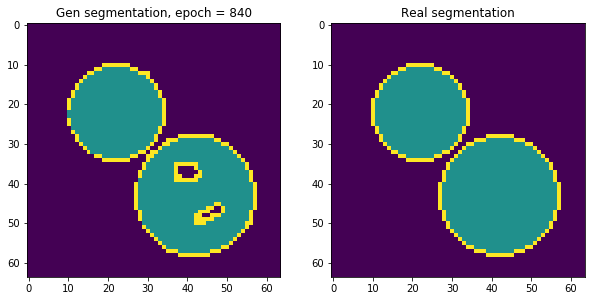

epoch - 840, loss - 0.5143857002258301
epoch - 841, loss - 0.5261856317520142
epoch - 842, loss - 0.506624162197113
epoch - 843, loss - 0.49564409255981445
epoch - 844, loss - 0.4837416410446167
epoch - 845, loss - 0.48622560501098633
epoch - 846, loss - 0.4793839156627655
epoch - 847, loss - 0.48279300332069397
epoch - 848, loss - 0.4724522531032562
epoch - 849, loss - 0.4732967019081116
epoch - 850, loss - 0.46339014172554016
epoch - 851, loss - 0.4681485891342163
epoch - 852, loss - 0.471902459859848
epoch - 853, loss - 0.4879140257835388
epoch - 854, loss - 0.5005670189857483
epoch - 855, loss - 0.5217351913452148
epoch - 856, loss - 0.5387044548988342
epoch - 857, loss - 0.5499106645584106
epoch - 858, loss - 0.5218515396118164
epoch - 859, loss - 0.4889047145843506


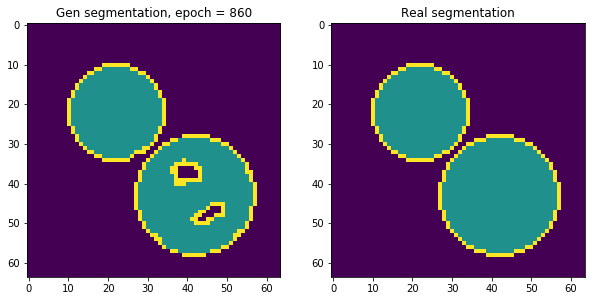

epoch - 860, loss - 0.45914655923843384
epoch - 861, loss - 0.4475048780441284
epoch - 862, loss - 0.4473683536052704
epoch - 863, loss - 0.46152666211128235
epoch - 864, loss - 0.4685942530632019
epoch - 865, loss - 0.46386921405792236
epoch - 866, loss - 0.44717657566070557
epoch - 867, loss - 0.43347495794296265
epoch - 868, loss - 0.4257243871688843
epoch - 869, loss - 0.43066611886024475
epoch - 870, loss - 0.43952322006225586
epoch - 871, loss - 0.4503479599952698
epoch - 872, loss - 0.4561344087123871
epoch - 873, loss - 0.45509517192840576
epoch - 874, loss - 0.45159682631492615
epoch - 875, loss - 0.44535693526268005
epoch - 876, loss - 0.437652587890625
epoch - 877, loss - 0.42635059356689453
epoch - 878, loss - 0.41899609565734863
epoch - 879, loss - 0.412676602602005


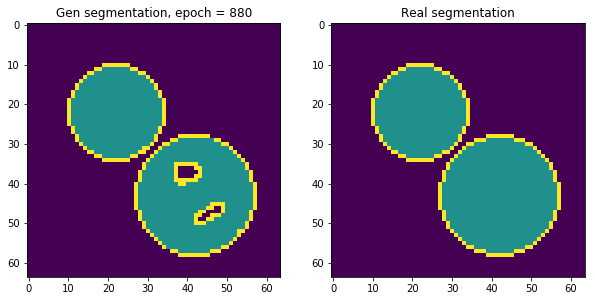

epoch - 880, loss - 0.4149388372898102
epoch - 881, loss - 0.4161551892757416
epoch - 882, loss - 0.423800528049469
epoch - 883, loss - 0.4259287416934967
epoch - 884, loss - 0.43307143449783325
epoch - 885, loss - 0.4229797124862671
epoch - 886, loss - 0.41408681869506836
epoch - 887, loss - 0.4061407446861267
epoch - 888, loss - 0.40807875990867615
epoch - 889, loss - 0.41096729040145874
epoch - 890, loss - 0.4101603329181671
epoch - 891, loss - 0.4136168360710144
epoch - 892, loss - 0.4262373447418213
epoch - 893, loss - 0.445663720369339
epoch - 894, loss - 0.4727706015110016
epoch - 895, loss - 0.49927887320518494
epoch - 896, loss - 0.5095781087875366
epoch - 897, loss - 0.4833407998085022
epoch - 898, loss - 0.4492962062358856
epoch - 899, loss - 0.42892974615097046


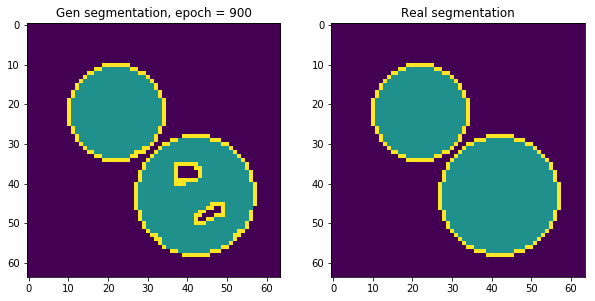

epoch - 900, loss - 0.4194830060005188
epoch - 901, loss - 0.4193270802497864
epoch - 902, loss - 0.41805028915405273
epoch - 903, loss - 0.4198944568634033
epoch - 904, loss - 0.4019343852996826
epoch - 905, loss - 0.39309582114219666
epoch - 906, loss - 0.3894074559211731
epoch - 907, loss - 0.3908322751522064
epoch - 908, loss - 0.38955286145210266
epoch - 909, loss - 0.38867759704589844
epoch - 910, loss - 0.38597041368484497
epoch - 911, loss - 0.3816955089569092
epoch - 912, loss - 0.3746396005153656
epoch - 913, loss - 0.3682210147380829
epoch - 914, loss - 0.3655011057853699
epoch - 915, loss - 0.36766141653060913
epoch - 916, loss - 0.37187063694000244
epoch - 917, loss - 0.37833118438720703
epoch - 918, loss - 0.3853095471858978
epoch - 919, loss - 0.3914167881011963


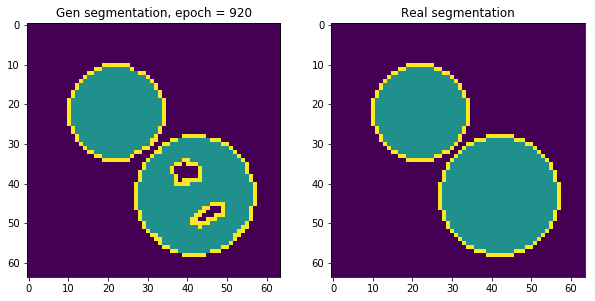

epoch - 920, loss - 0.39566564559936523
epoch - 921, loss - 0.39894360303878784
epoch - 922, loss - 0.40009286999702454
epoch - 923, loss - 0.3945064842700958
epoch - 924, loss - 0.3793613612651825
epoch - 925, loss - 0.3630051016807556
epoch - 926, loss - 0.35446760058403015
epoch - 927, loss - 0.34992140531539917
epoch - 928, loss - 0.3571626543998718
epoch - 929, loss - 0.36127156019210815
epoch - 930, loss - 0.3638988435268402
epoch - 931, loss - 0.35676175355911255
epoch - 932, loss - 0.3498605191707611
epoch - 933, loss - 0.34100091457366943
epoch - 934, loss - 0.33530300855636597
epoch - 935, loss - 0.3336036205291748
epoch - 936, loss - 0.3348739445209503
epoch - 937, loss - 0.33918213844299316
epoch - 938, loss - 0.34176474809646606
epoch - 939, loss - 0.3467026948928833


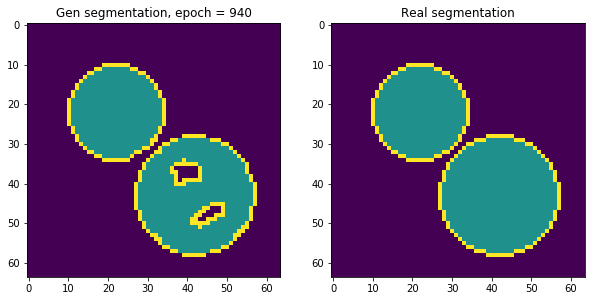

epoch - 940, loss - 0.3520367741584778
epoch - 941, loss - 0.3646232783794403
epoch - 942, loss - 0.380543053150177
epoch - 943, loss - 0.4015229344367981
epoch - 944, loss - 0.40992245078086853
epoch - 945, loss - 0.40501075983047485
epoch - 946, loss - 0.371460884809494
epoch - 947, loss - 0.3395508825778961
epoch - 948, loss - 0.3251109719276428
epoch - 949, loss - 0.332815021276474
epoch - 950, loss - 0.3485563099384308
epoch - 951, loss - 0.3539305627346039
epoch - 952, loss - 0.3427654802799225
epoch - 953, loss - 0.3222176134586334
epoch - 954, loss - 0.3184479773044586
epoch - 955, loss - 0.319265753030777
epoch - 956, loss - 0.32573261857032776
epoch - 957, loss - 0.3312085270881653
epoch - 958, loss - 0.32459700107574463
epoch - 959, loss - 0.32057487964630127


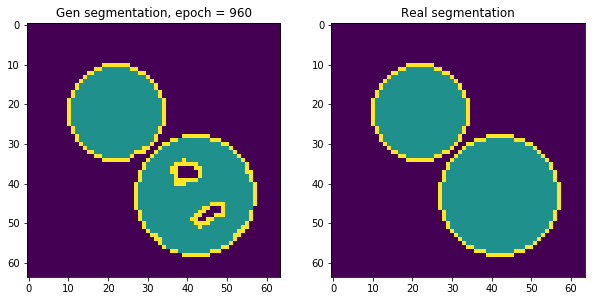

epoch - 960, loss - 0.31336796283721924
epoch - 961, loss - 0.30666351318359375
epoch - 962, loss - 0.3084179162979126
epoch - 963, loss - 0.3087385594844818
epoch - 964, loss - 0.3119274079799652
epoch - 965, loss - 0.3202004134654999
epoch - 966, loss - 0.3227498531341553
epoch - 967, loss - 0.3344806432723999
epoch - 968, loss - 0.3387458324432373
epoch - 969, loss - 0.33849236369132996
epoch - 970, loss - 0.34406033158302307
epoch - 971, loss - 0.3503078520298004
epoch - 972, loss - 0.36209410429000854
epoch - 973, loss - 0.3648453950881958
epoch - 974, loss - 0.3750530481338501
epoch - 975, loss - 0.40714025497436523
epoch - 976, loss - 0.41854944825172424
epoch - 977, loss - 0.4047541618347168
epoch - 978, loss - 0.35561564564704895
epoch - 979, loss - 0.3424910604953766


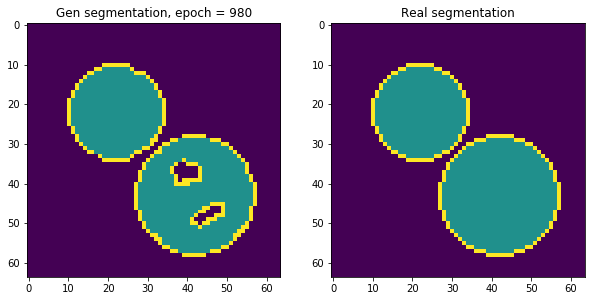

epoch - 980, loss - 0.34597596526145935
epoch - 981, loss - 0.3502119183540344
epoch - 982, loss - 0.3284994959831238
epoch - 983, loss - 0.30355706810951233
epoch - 984, loss - 0.3147704005241394
epoch - 985, loss - 0.3387753963470459
epoch - 986, loss - 0.327625036239624
epoch - 987, loss - 0.3064003884792328
epoch - 988, loss - 0.3086578845977783
epoch - 989, loss - 0.3091748356819153
epoch - 990, loss - 0.2946646213531494
epoch - 991, loss - 0.2827616035938263
epoch - 992, loss - 0.2934993803501129
epoch - 993, loss - 0.3023340106010437
epoch - 994, loss - 0.29371798038482666
epoch - 995, loss - 0.2847180664539337
epoch - 996, loss - 0.2879829406738281
epoch - 997, loss - 0.28692618012428284
epoch - 998, loss - 0.2818340063095093
epoch - 999, loss - 0.27247706055641174


In [13]:
optimizer = optim.Adam([z_input] + list(net.parameters()), lr=0.001)

loss_epoch = []
num_epochs = 1000
print_history = 20
segmentation_loss = []

for epoch in range(num_epochs):
    normalize_z(z_input)
    optimizer.zero_grad()   
    img, segm = net(z_input)
    
    if epoch % print_history == 0:
        plot_segmentation(segm[-1:], 
                          train_segmentation[-1:], 
                          epoch)
        
    loss = segm_loss(segm[:-without_segmentation], 
                     train_segmentation[:-without_segmentation]) + 1000 * img_loss(img, train_images)
    loss_epoch.append(loss.data)
    segmentation_loss.append(segm_loss(segm[-without_segmentation:],
                                       train_segmentation[-without_segmentation:]).data[0])
    
    loss.backward()
    optimizer.step()
    print('epoch - {}, loss - {}'.format(epoch, loss.data.numpy()[0]))

normalize_z(z_input)

### Segmentation loss

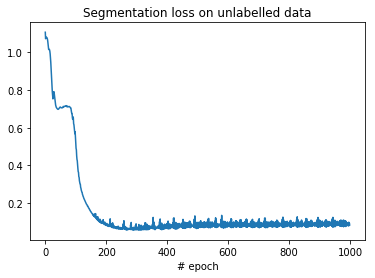

In [34]:
plt.plot(segmentation_loss)
plt.title('Segmentation loss on unlabelled data')
plt.xlabel('# epoch')
plt.show()

In [44]:
print('iteration with'.format(np.argmin(segmentation_loss)))

313

In [ ]:
torch.save(net.state_dict(), './model-1000')

### learning

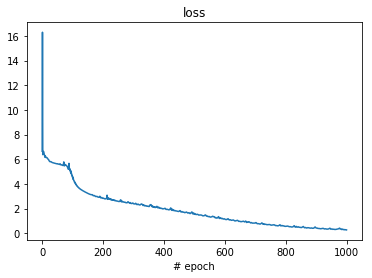

In [26]:
plt.plot(loss_epoch)
plt.title('loss')
plt.xlabel('# epoch')
plt.show()

In [21]:
img, segm = net(z_input)

### Results 

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


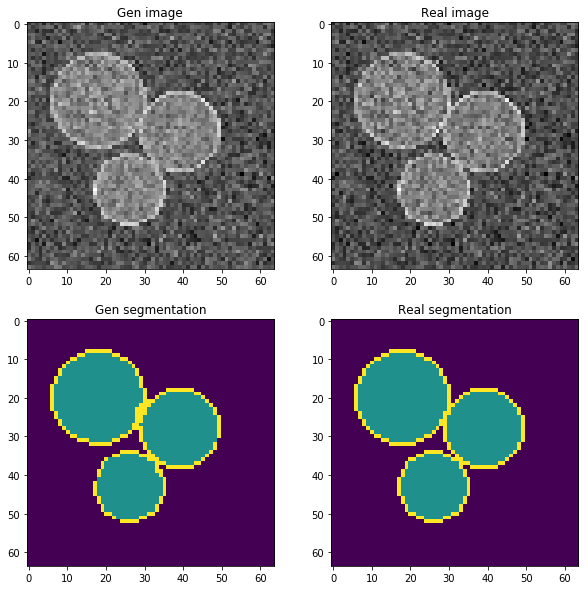

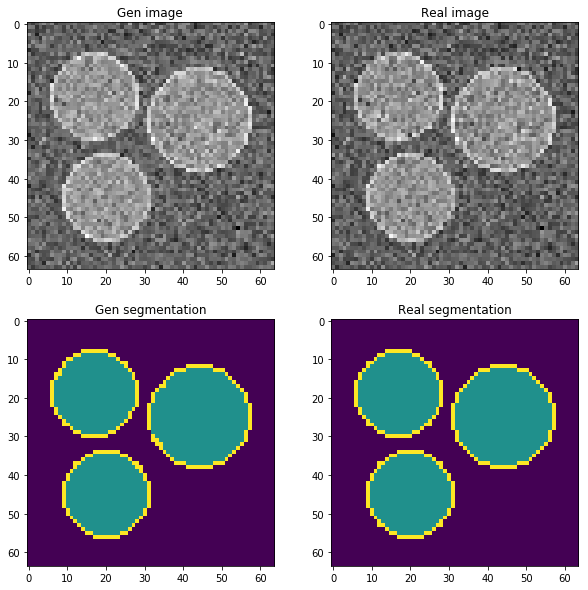

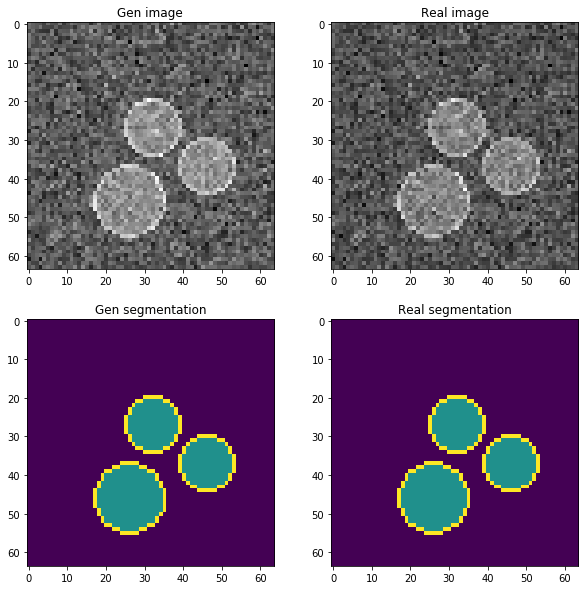

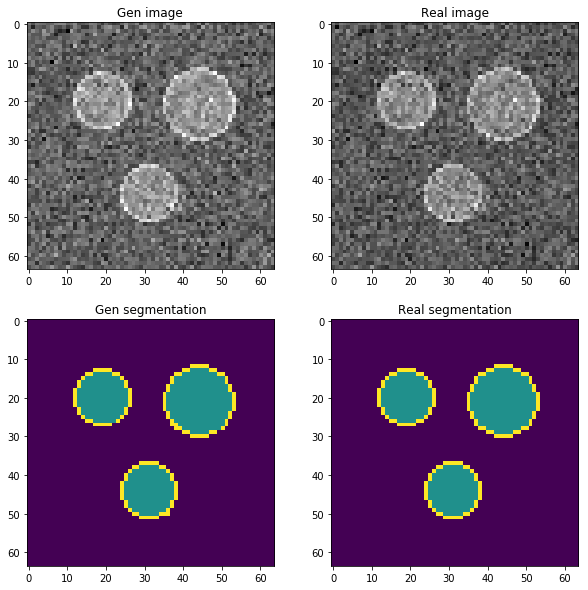

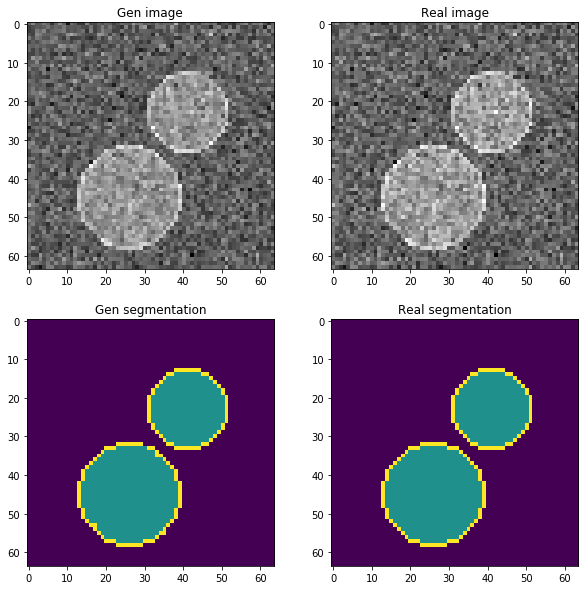

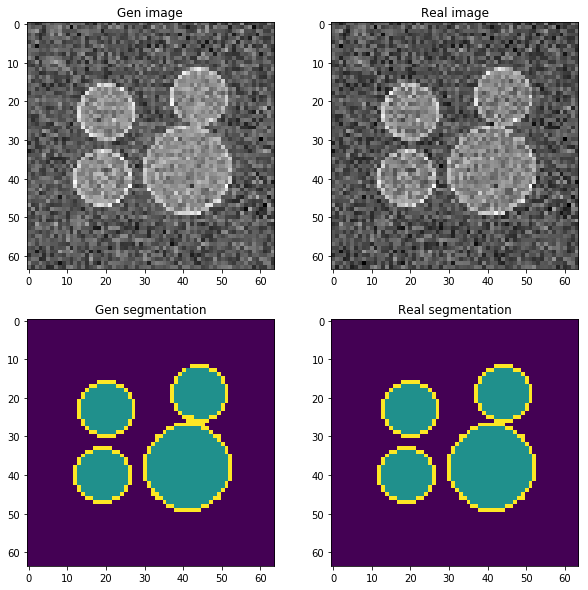

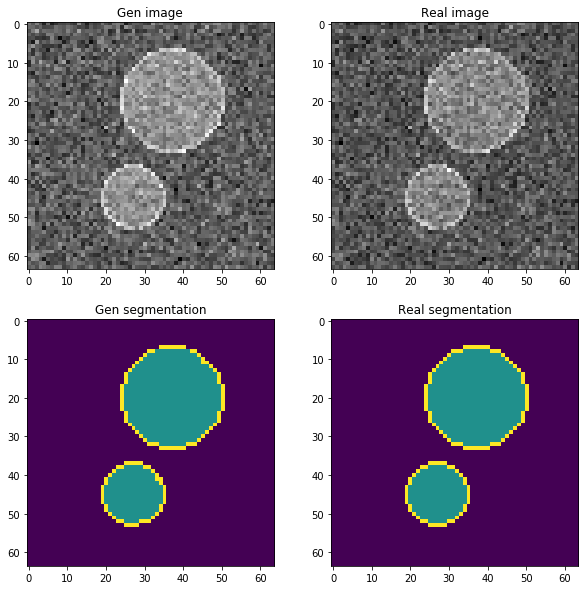

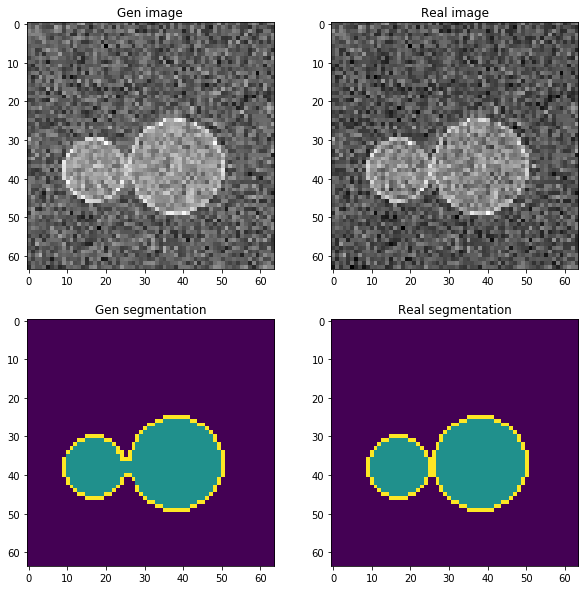

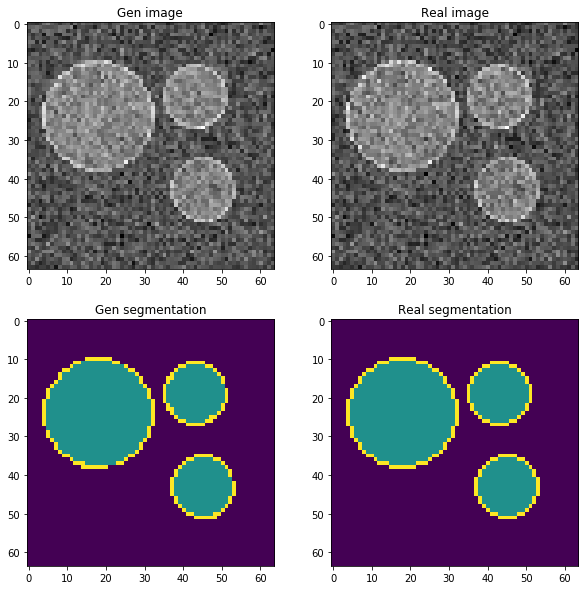

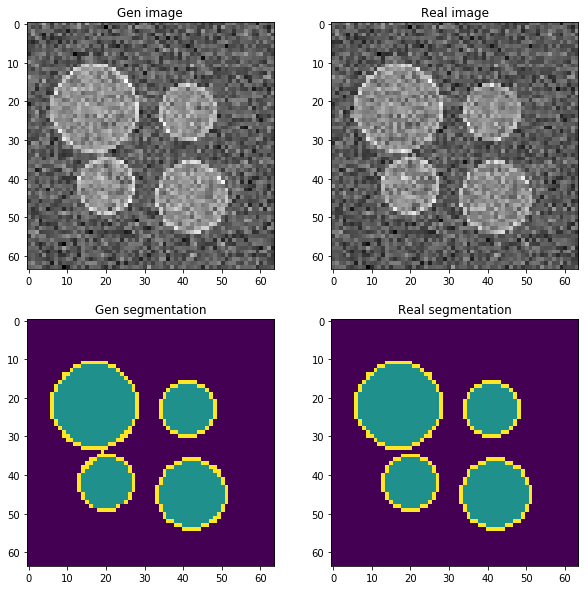

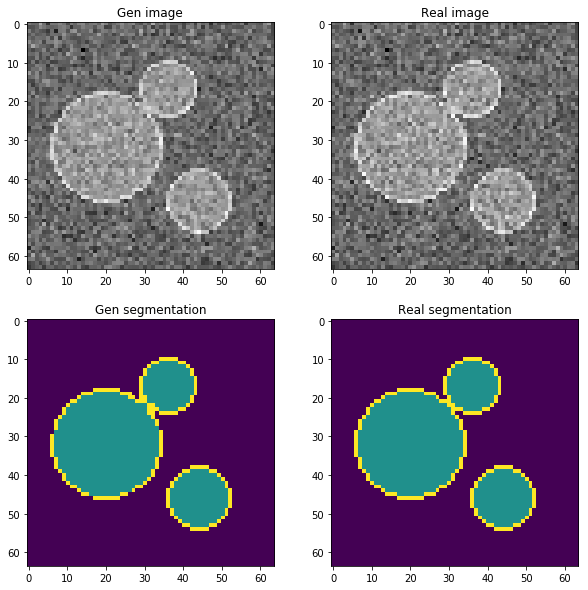

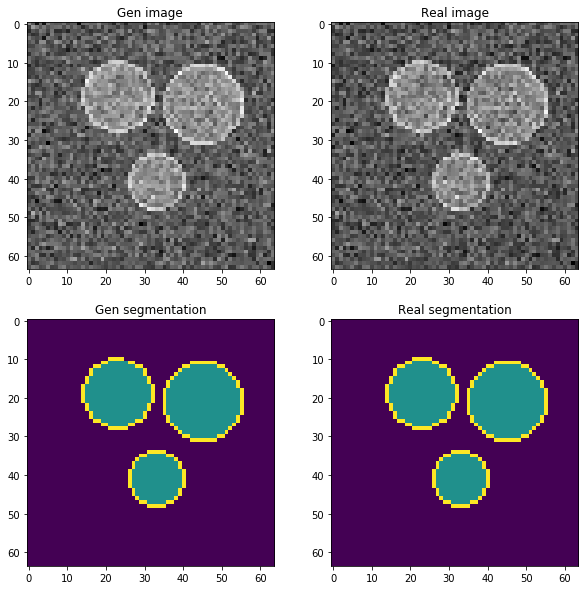

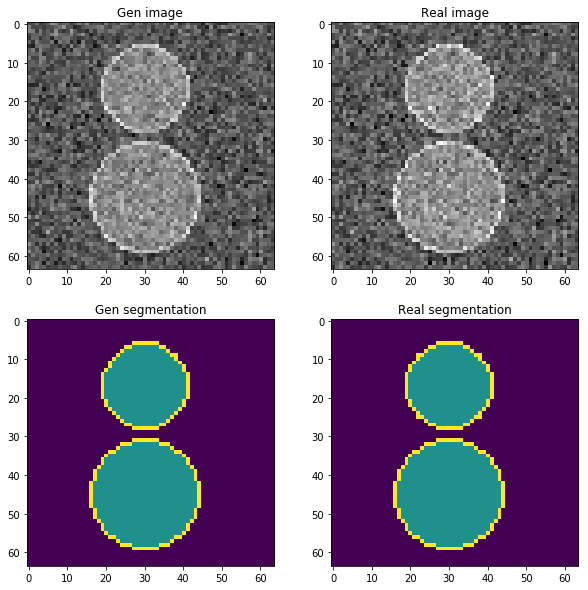

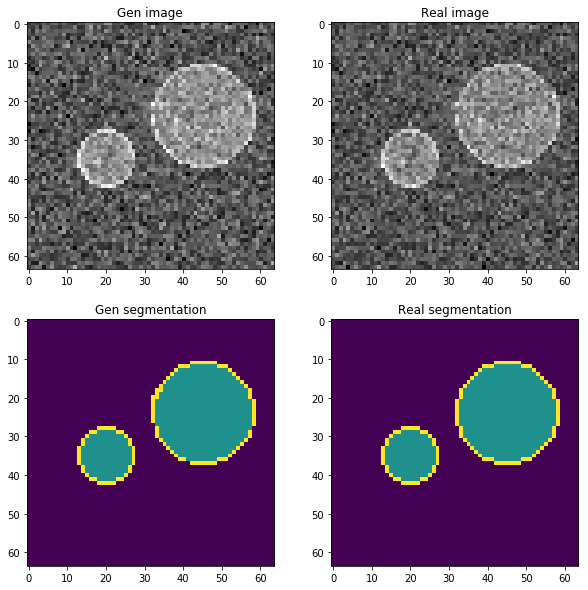

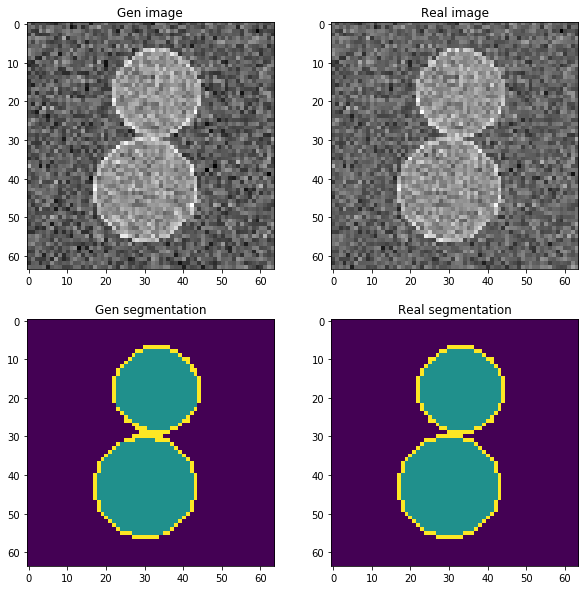

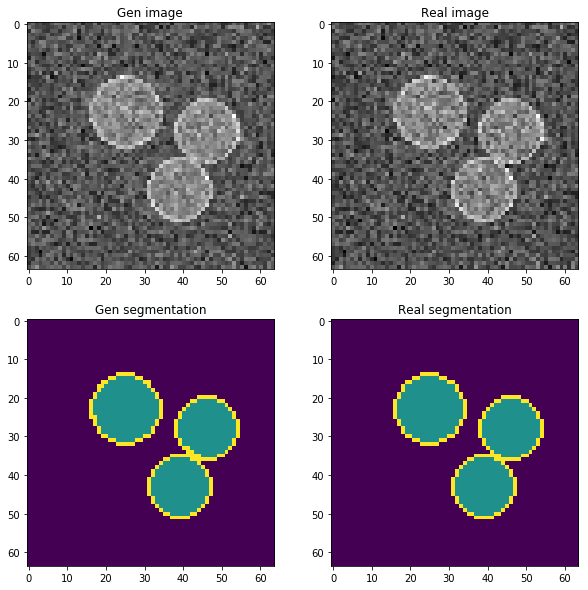

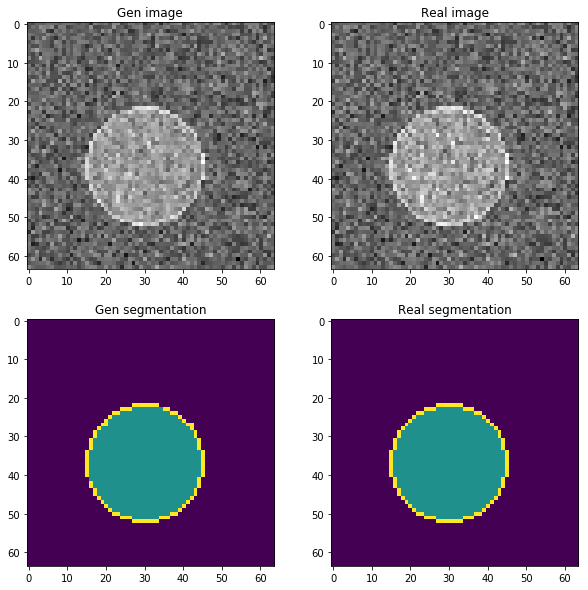

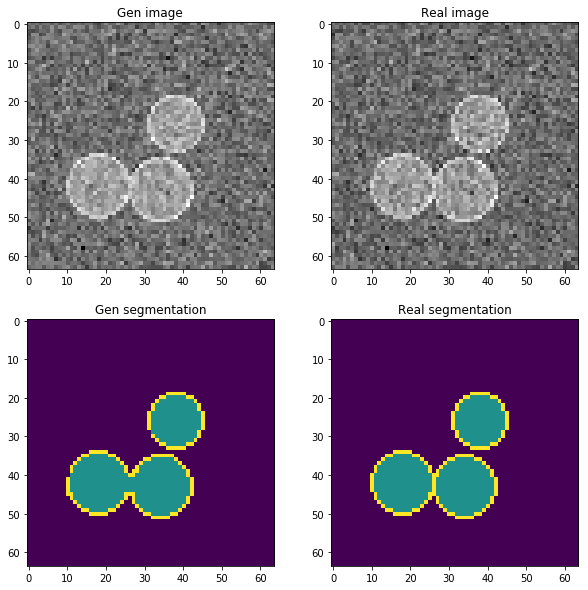

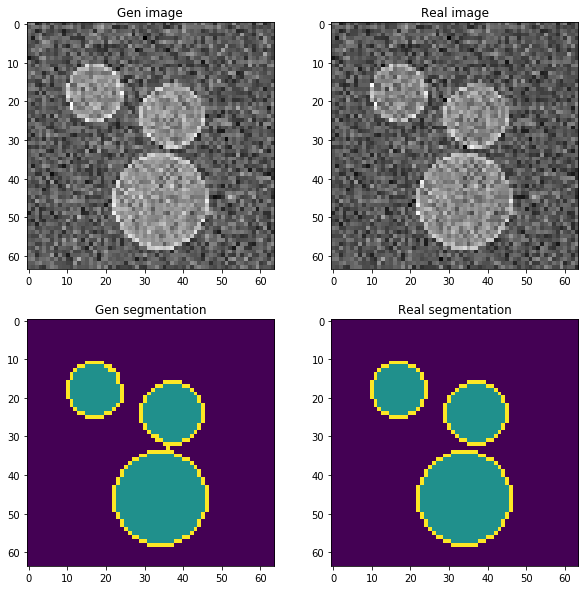

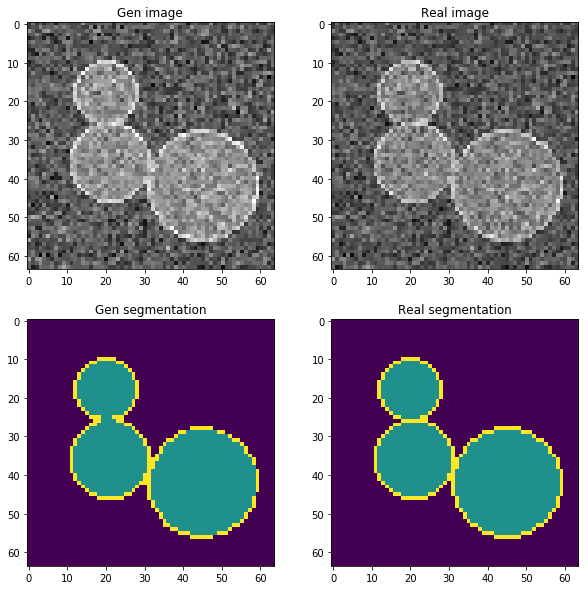

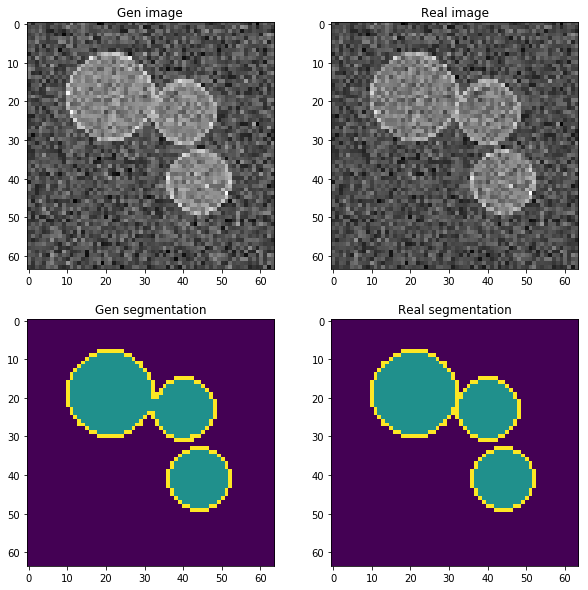

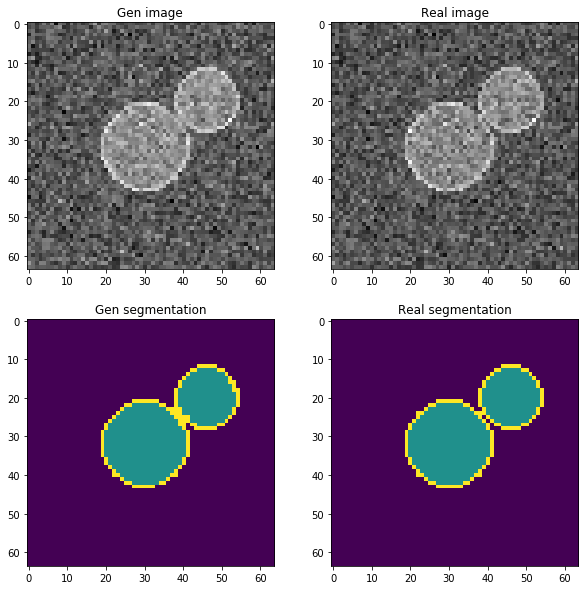

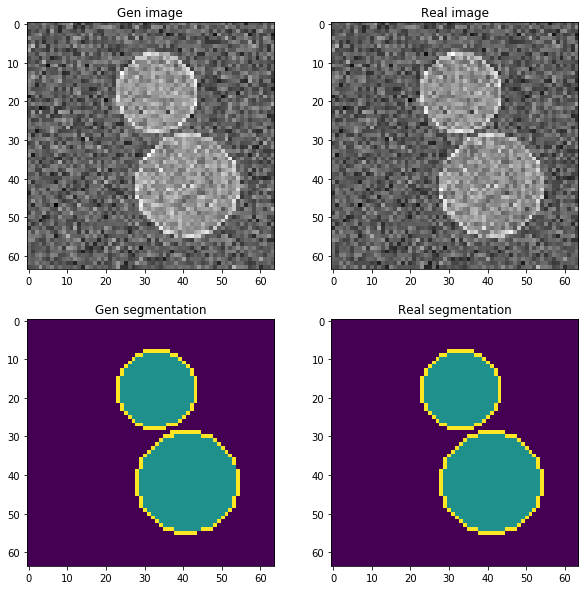

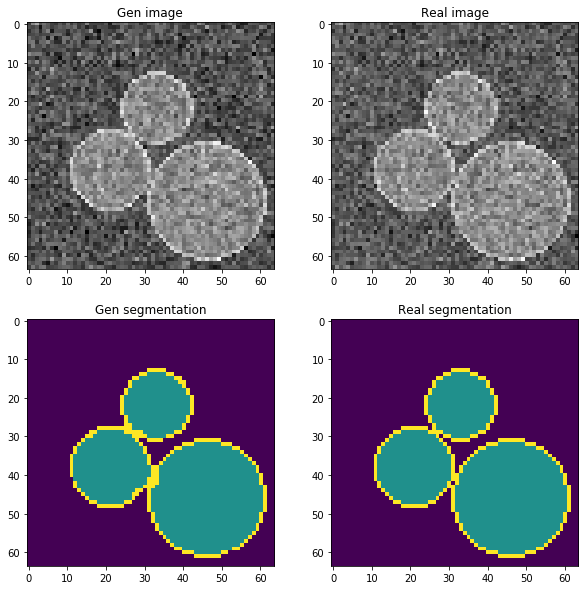

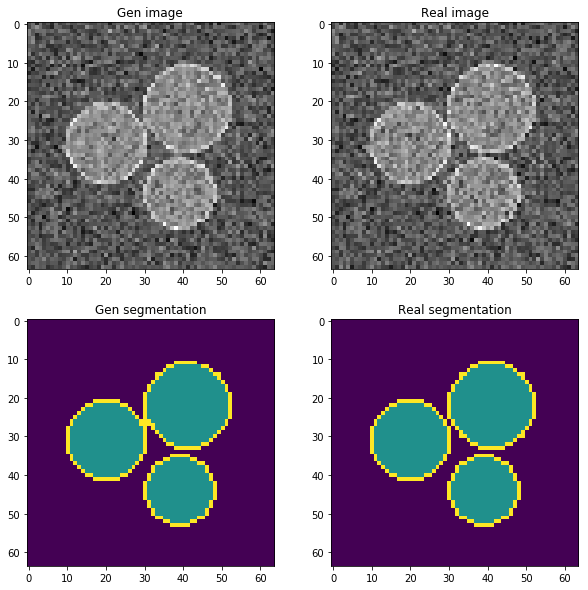

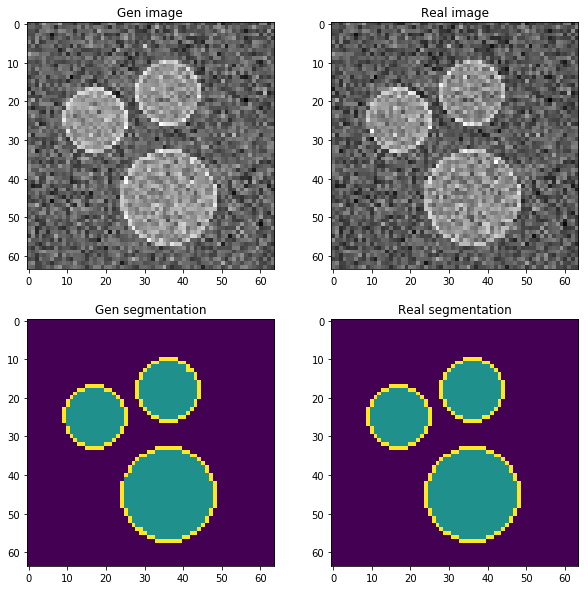

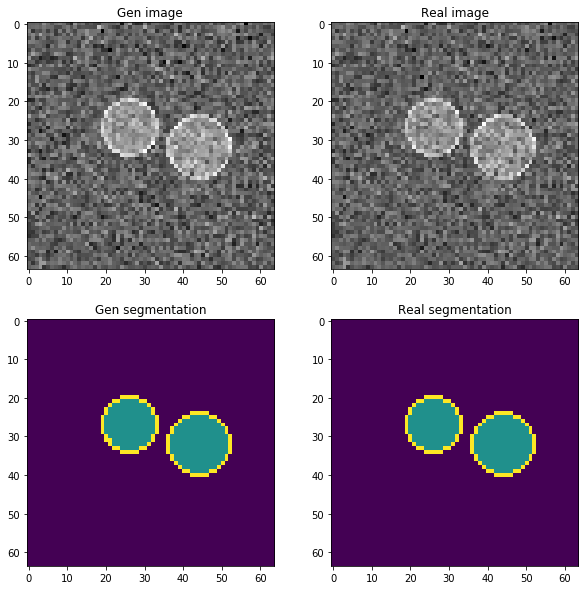

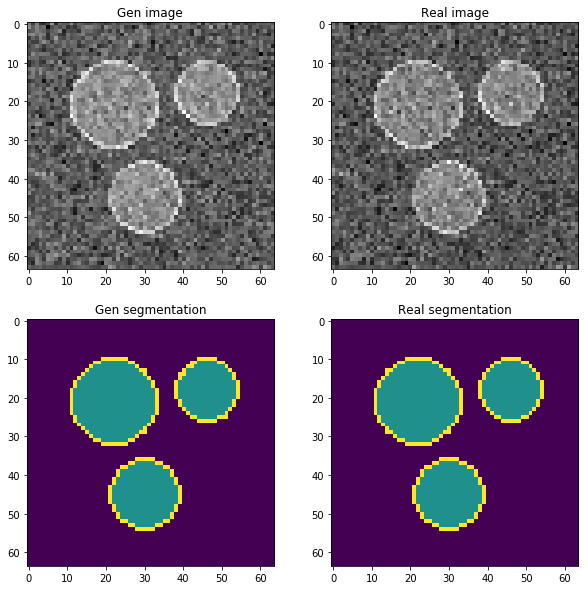

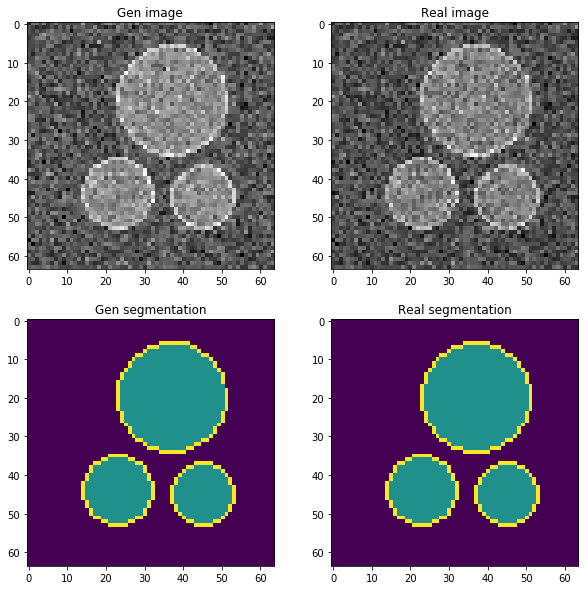

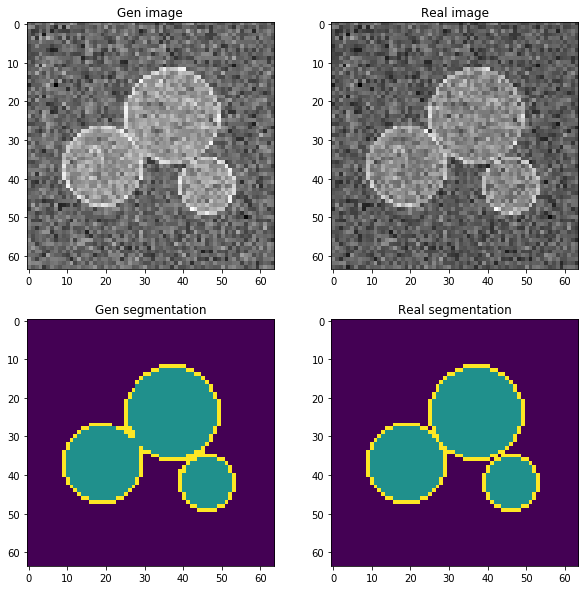

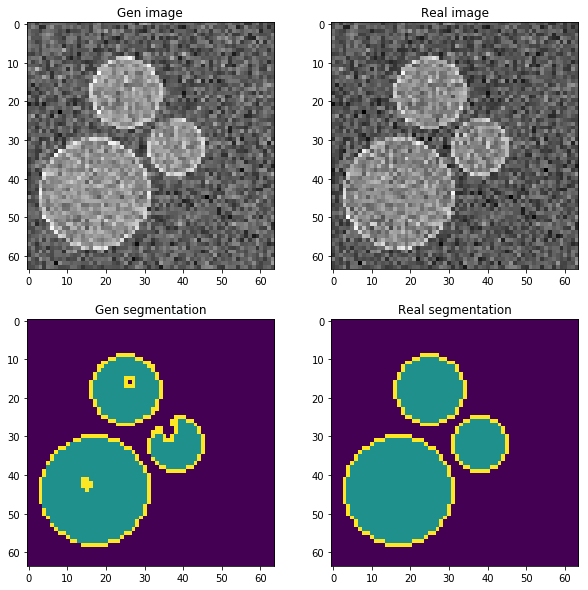

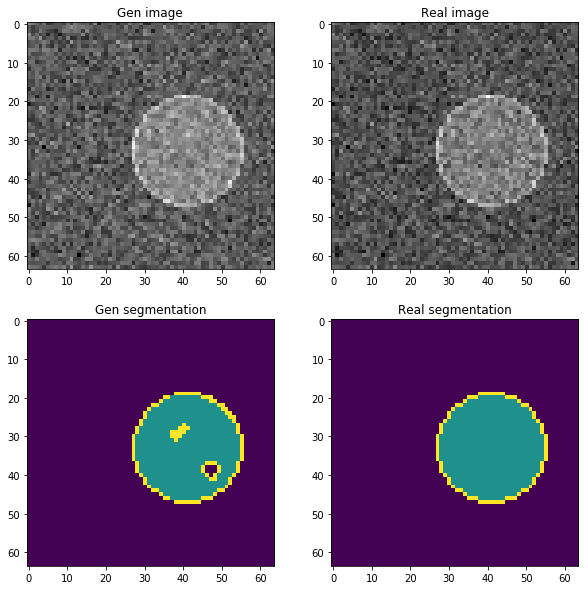

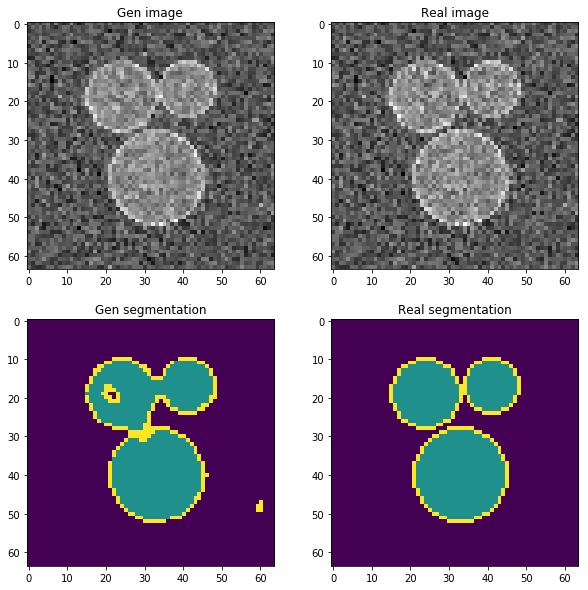

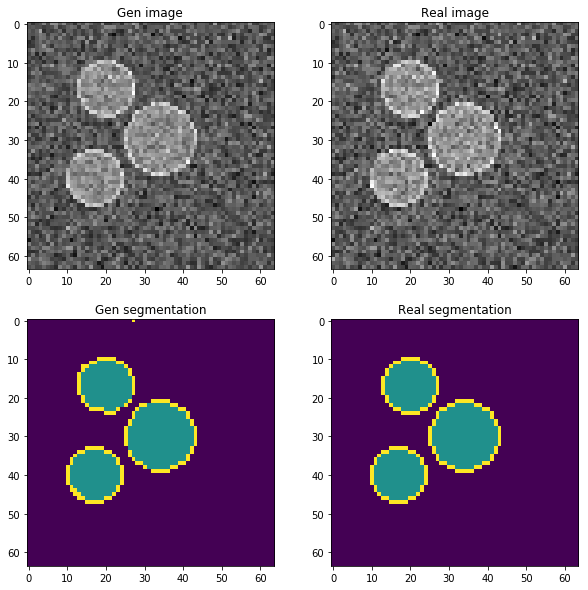

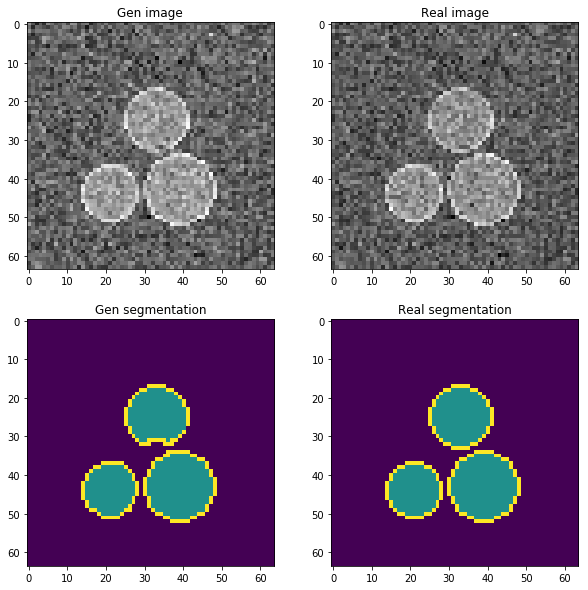

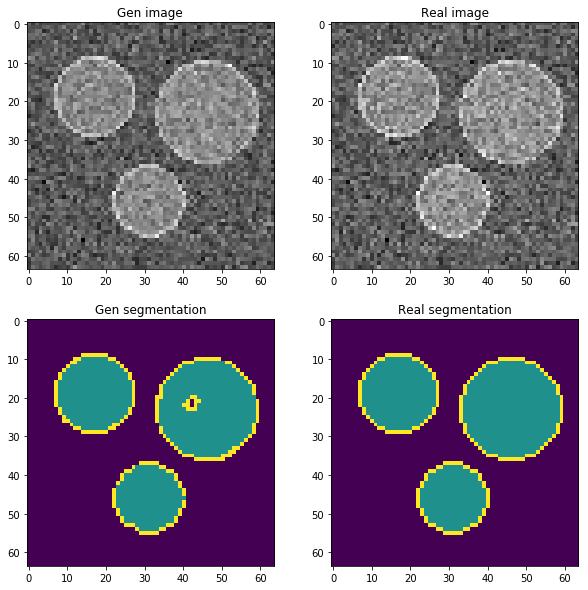

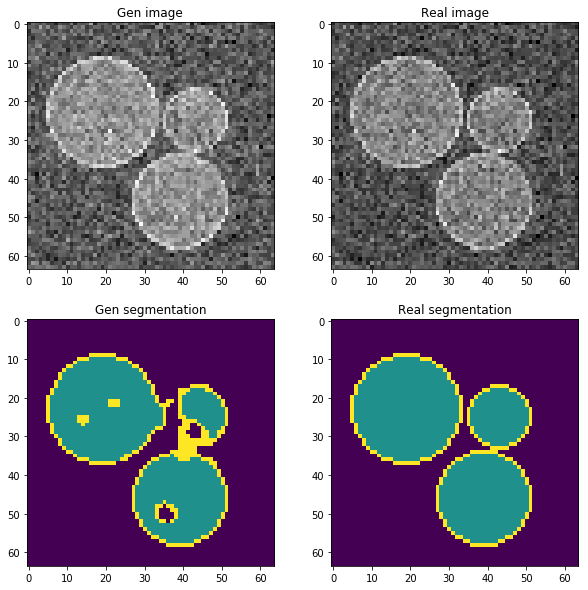

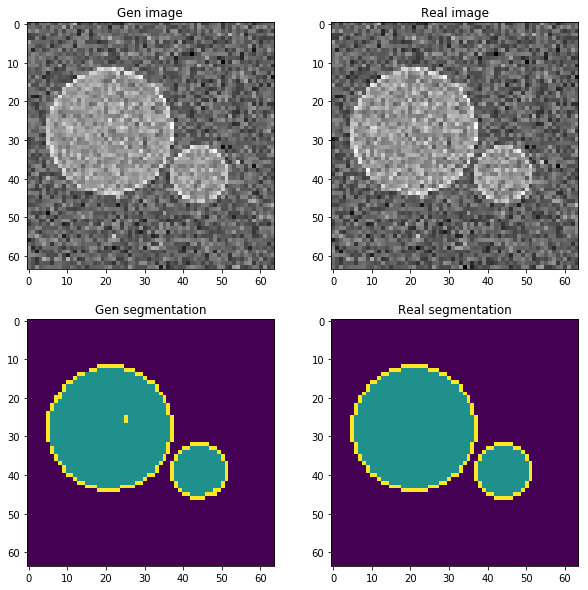

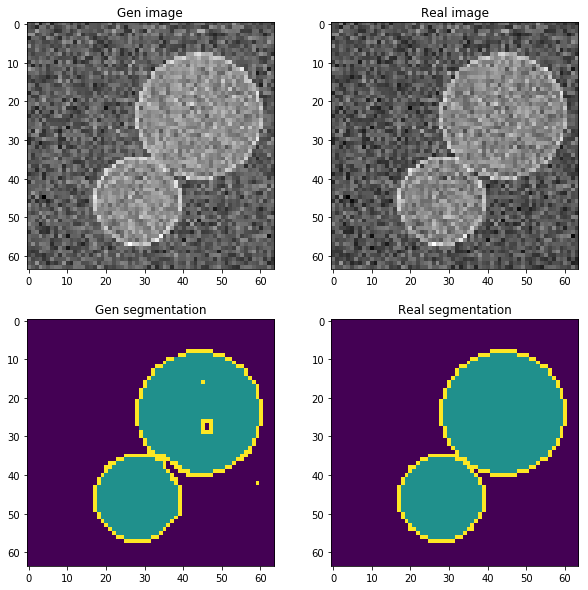

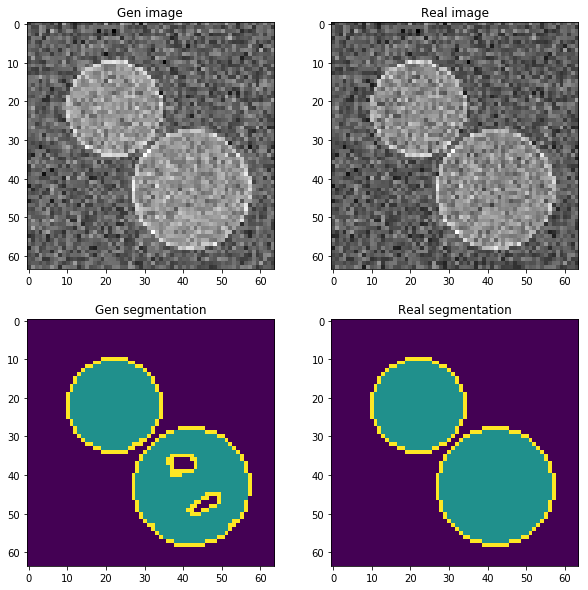

In [22]:
show_image_segm(img.data.numpy(), segm.data.numpy(), 
                train_images.data.numpy(), train_segmentation.data.numpy())

### generate test batch

In [35]:
test_batch_size = 5

In [36]:
np.random.seed(42)
test_images, test_segmentation = predata.get_train_batch(test_batch_size)

In [37]:
test_images = Variable(torch.from_numpy(test_images).float(), requires_grad=False)
test_segm = Variable(torch.from_numpy(test_segmentation), requires_grad=False)

In [38]:
torch.manual_seed(42)
z_test = Variable(torch.randn(test_batch_size, 3, 64, 64), requires_grad=True)

### Optimizing only latent variable z

In [39]:
optimizer = optim.Adam([z_test], lr=0.001)

test_loss = []
num_epochs = 1000

for epoch in range(num_epochs):
    normalize_z(z_test)
    optimizer.zero_grad()   
    img, segm = net(z_test)
    loss = 1000 * img_loss(img, test_images)
    loss_epoch.append(loss.data)
    loss.backward()
    optimizer.step()
    print('epoch - {}, loss - {}'.format(epoch, loss.data.numpy()[0]))

normalize_z(z_test)

epoch - 0, loss - 11.314262390136719
epoch - 1, loss - 11.172603607177734
epoch - 2, loss - 11.036794662475586
epoch - 3, loss - 10.906639099121094
epoch - 4, loss - 10.781561851501465
epoch - 5, loss - 10.661497116088867
epoch - 6, loss - 10.546063423156738
epoch - 7, loss - 10.434816360473633
epoch - 8, loss - 10.326117515563965
epoch - 9, loss - 10.220836639404297
epoch - 10, loss - 10.12100887298584
epoch - 11, loss - 10.024309158325195
epoch - 12, loss - 9.930743217468262
epoch - 13, loss - 9.840301513671875
epoch - 14, loss - 9.751286506652832
epoch - 15, loss - 9.66365909576416
epoch - 16, loss - 9.578269958496094
epoch - 17, loss - 9.495210647583008
epoch - 18, loss - 9.41288948059082
epoch - 19, loss - 9.332444190979004
epoch - 20, loss - 9.253595352172852
epoch - 21, loss - 9.175716400146484
epoch - 22, loss - 9.0995454788208
epoch - 23, loss - 9.02514362335205
epoch - 24, loss - 8.953045845031738
epoch - 25, loss - 8.88242244720459
epoch - 26, loss - 8.814014434814453
epoch 

epoch - 218, loss - 3.6528117656707764
epoch - 219, loss - 3.640476703643799
epoch - 220, loss - 3.6281700134277344
epoch - 221, loss - 3.616135597229004
epoch - 222, loss - 3.6043360233306885
epoch - 223, loss - 3.5926105976104736
epoch - 224, loss - 3.580941677093506
epoch - 225, loss - 3.5693764686584473
epoch - 226, loss - 3.5578806400299072
epoch - 227, loss - 3.546419620513916
epoch - 228, loss - 3.5349996089935303
epoch - 229, loss - 3.5237317085266113
epoch - 230, loss - 3.5125679969787598
epoch - 231, loss - 3.5014402866363525
epoch - 232, loss - 3.490344524383545
epoch - 233, loss - 3.479234457015991
epoch - 234, loss - 3.4681856632232666
epoch - 235, loss - 3.457221508026123
epoch - 236, loss - 3.4462978839874268
epoch - 237, loss - 3.435487985610962
epoch - 238, loss - 3.4246976375579834
epoch - 239, loss - 3.4139935970306396
epoch - 240, loss - 3.403395414352417
epoch - 241, loss - 3.3928704261779785
epoch - 242, loss - 3.38236141204834
epoch - 243, loss - 3.37185382843017

epoch - 431, loss - 2.002042770385742
epoch - 432, loss - 1.9972575902938843
epoch - 433, loss - 1.9924817085266113
epoch - 434, loss - 1.9877418279647827
epoch - 435, loss - 1.9830074310302734
epoch - 436, loss - 1.9783331155776978
epoch - 437, loss - 1.9736595153808594
epoch - 438, loss - 1.9689984321594238
epoch - 439, loss - 1.964360237121582
epoch - 440, loss - 1.9597376585006714
epoch - 441, loss - 1.9551182985305786
epoch - 442, loss - 1.9505209922790527
epoch - 443, loss - 1.9459606409072876
epoch - 444, loss - 1.941426396369934
epoch - 445, loss - 1.936893343925476
epoch - 446, loss - 1.9323749542236328
epoch - 447, loss - 1.927885890007019
epoch - 448, loss - 1.9234049320220947
epoch - 449, loss - 1.9189475774765015
epoch - 450, loss - 1.9144952297210693
epoch - 451, loss - 1.9100451469421387
epoch - 452, loss - 1.9056291580200195
epoch - 453, loss - 1.9012504816055298
epoch - 454, loss - 1.896868109703064
epoch - 455, loss - 1.892532467842102
epoch - 456, loss - 1.8881764411

epoch - 643, loss - 1.284690260887146
epoch - 644, loss - 1.2823147773742676
epoch - 645, loss - 1.2799328565597534
epoch - 646, loss - 1.2775710821151733
epoch - 647, loss - 1.2752177715301514
epoch - 648, loss - 1.2728590965270996
epoch - 649, loss - 1.2705154418945312
epoch - 650, loss - 1.2681835889816284
epoch - 651, loss - 1.2658601999282837
epoch - 652, loss - 1.2634931802749634
epoch - 653, loss - 1.2612248659133911
epoch - 654, loss - 1.2588835954666138
epoch - 655, loss - 1.2566086053848267
epoch - 656, loss - 1.2542916536331177
epoch - 657, loss - 1.2519811391830444
epoch - 658, loss - 1.24968683719635
epoch - 659, loss - 1.2473644018173218
epoch - 660, loss - 1.2450616359710693
epoch - 661, loss - 1.242784023284912
epoch - 662, loss - 1.2405332326889038
epoch - 663, loss - 1.2382636070251465
epoch - 664, loss - 1.2360564470291138
epoch - 665, loss - 1.2337745428085327
epoch - 666, loss - 1.231543779373169
epoch - 667, loss - 1.2293320894241333
epoch - 668, loss - 1.22706758

epoch - 855, loss - 0.8932399749755859
epoch - 856, loss - 0.8918250203132629
epoch - 857, loss - 0.8904109597206116
epoch - 858, loss - 0.889016330242157
epoch - 859, loss - 0.8876162767410278
epoch - 860, loss - 0.8862371444702148
epoch - 861, loss - 0.8848459124565125
epoch - 862, loss - 0.8834748864173889
epoch - 863, loss - 0.8821015357971191
epoch - 864, loss - 0.8807417750358582
epoch - 865, loss - 0.8793487548828125
epoch - 866, loss - 0.8780357837677002
epoch - 867, loss - 0.876656174659729
epoch - 868, loss - 0.8752977252006531
epoch - 869, loss - 0.8739495277404785
epoch - 870, loss - 0.8725830316543579
epoch - 871, loss - 0.87122642993927
epoch - 872, loss - 0.8698753118515015
epoch - 873, loss - 0.8685032725334167
epoch - 874, loss - 0.8671874403953552
epoch - 875, loss - 0.8658307194709778
epoch - 876, loss - 0.8644811511039734
epoch - 877, loss - 0.8631578683853149
epoch - 878, loss - 0.8618205785751343
epoch - 879, loss - 0.8604885339736938
epoch - 880, loss - 0.8591556

In [42]:
test_img, test_segm = net(z_test)

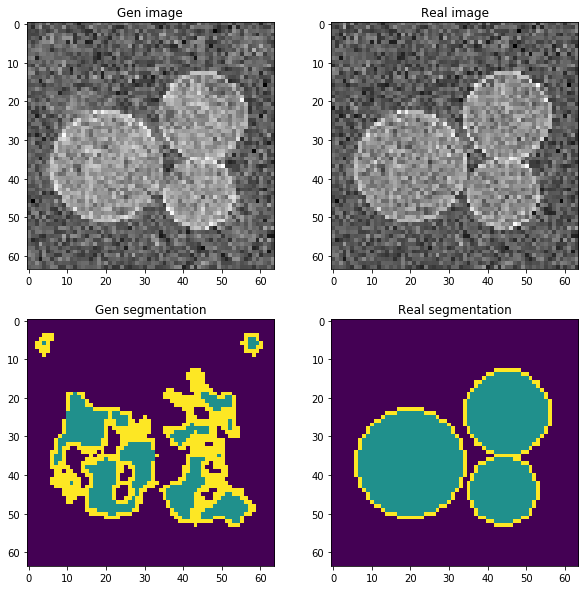

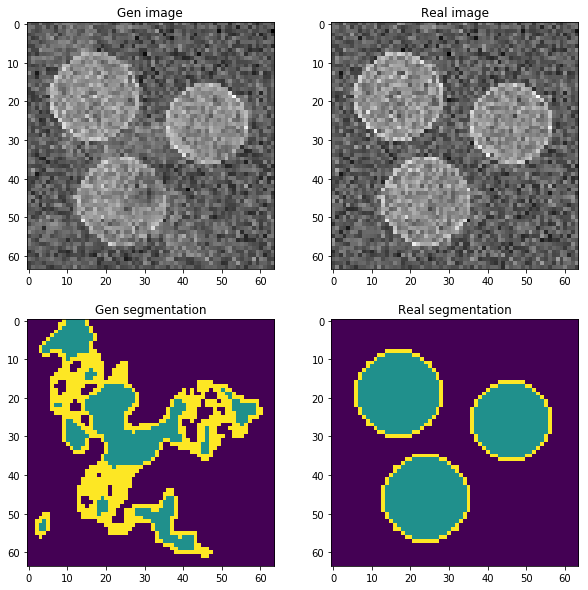

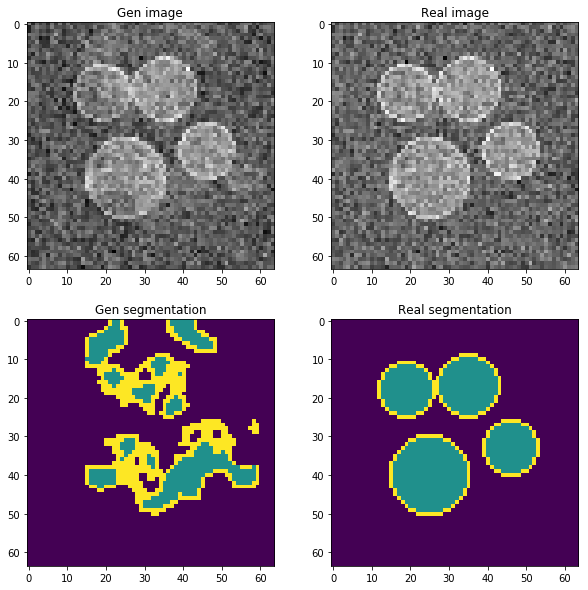

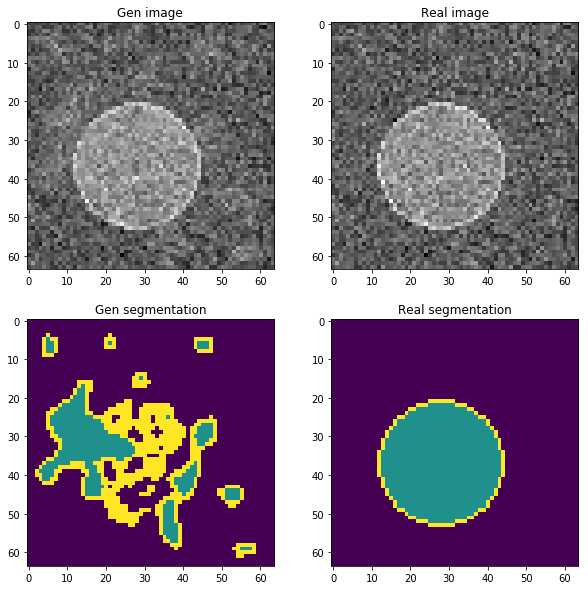

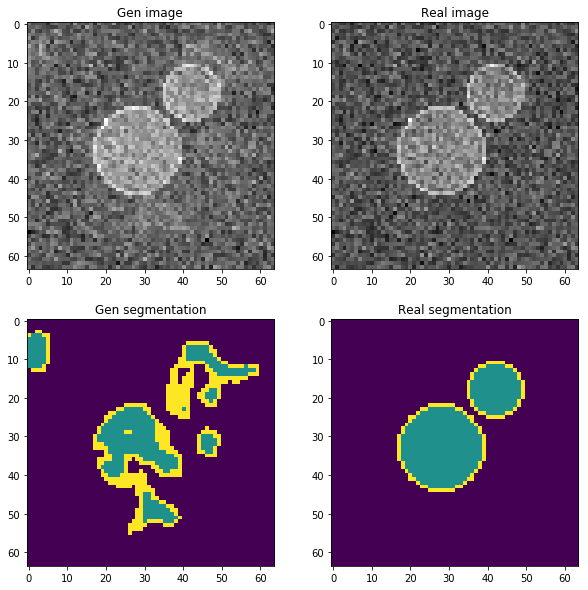

In [43]:
show_image_segm(test_img.data.numpy(), test_segm.data.numpy(), 
                test_images.data.numpy(), test_segmentation)